
Results for AAPL from ./data_with_indicators\stock_prices_15m_with_indicators.csv:
  Market Return: 0.9163
  Model Return: 1.0238
  Ideal Return: 1.8118


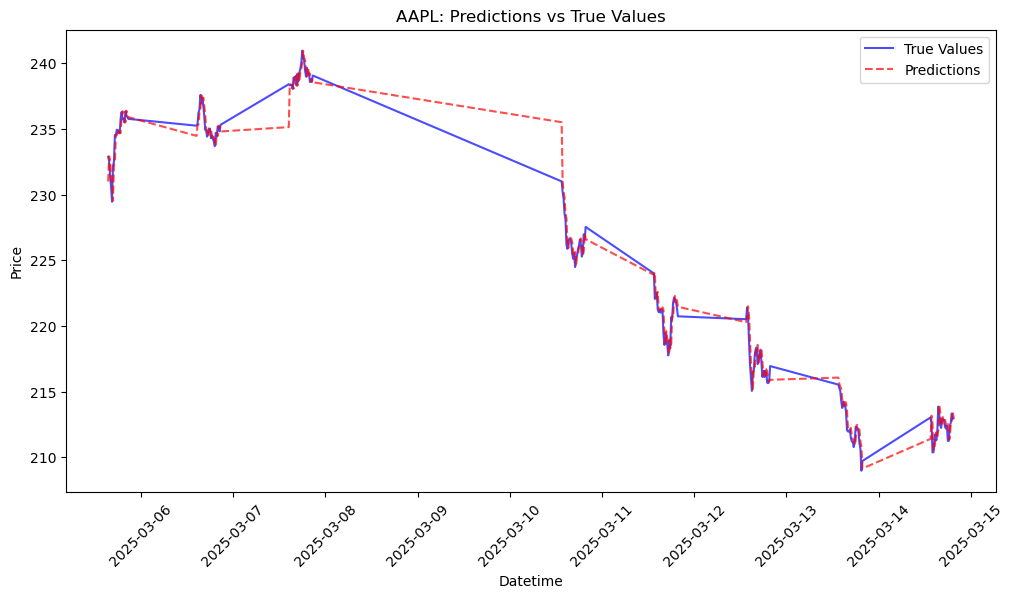

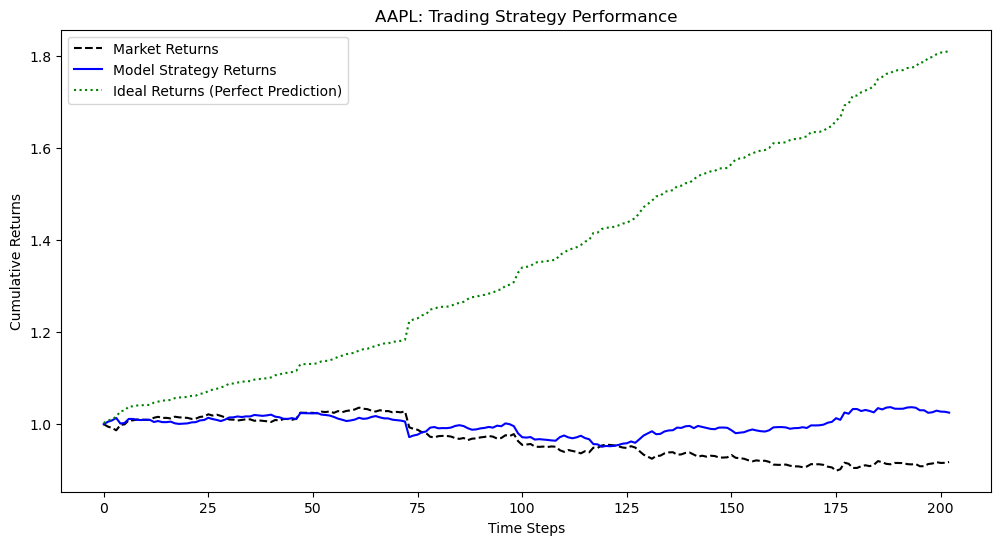


Results for MSFT from ./data_with_indicators\stock_prices_15m_with_indicators.csv:
  Market Return: 0.9900
  Model Return: 1.0293
  Ideal Return: 1.6355


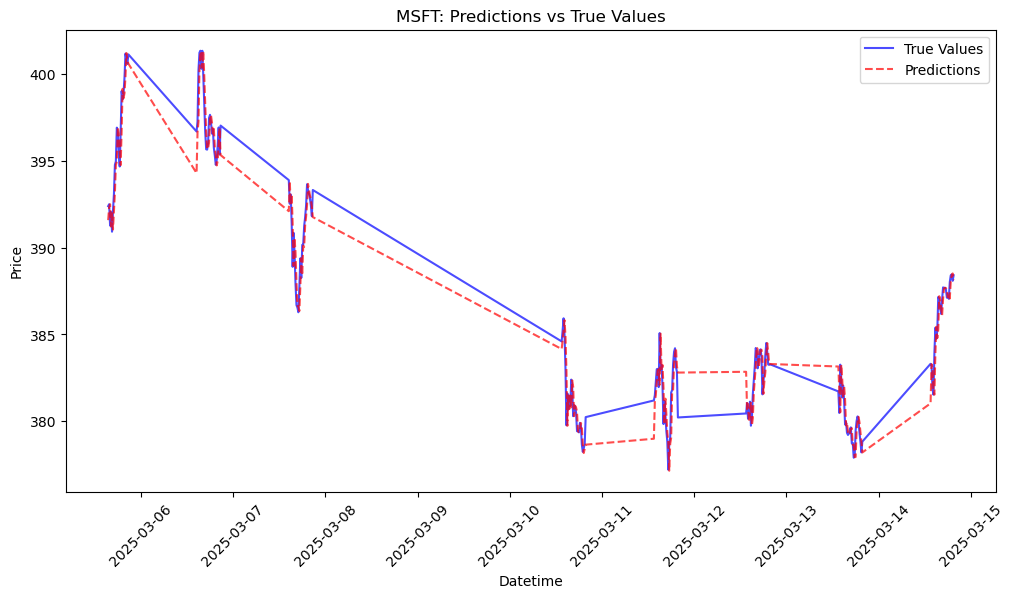

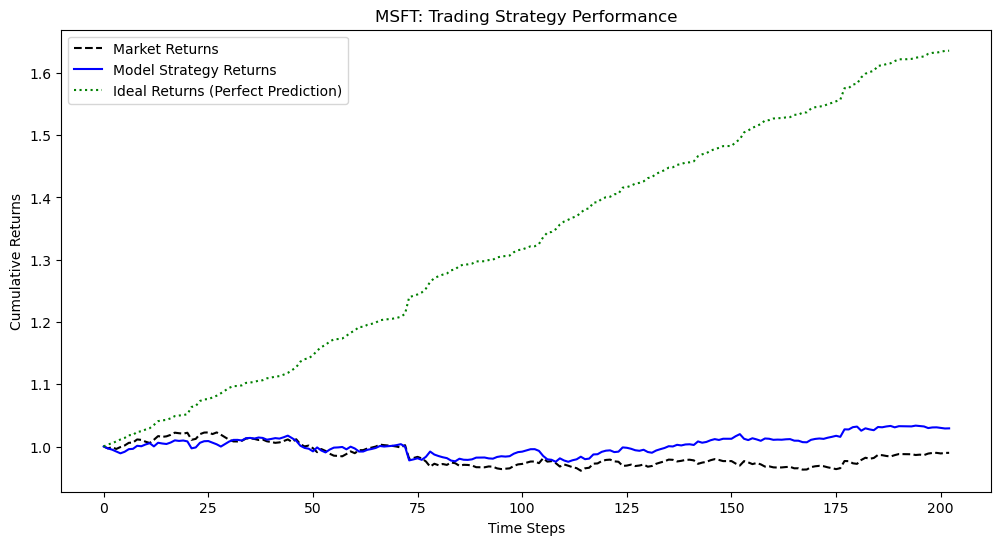


Results for GOOGL from ./data_with_indicators\stock_prices_15m_with_indicators.csv:
  Market Return: 0.9719
  Model Return: 0.9985
  Ideal Return: 1.8134


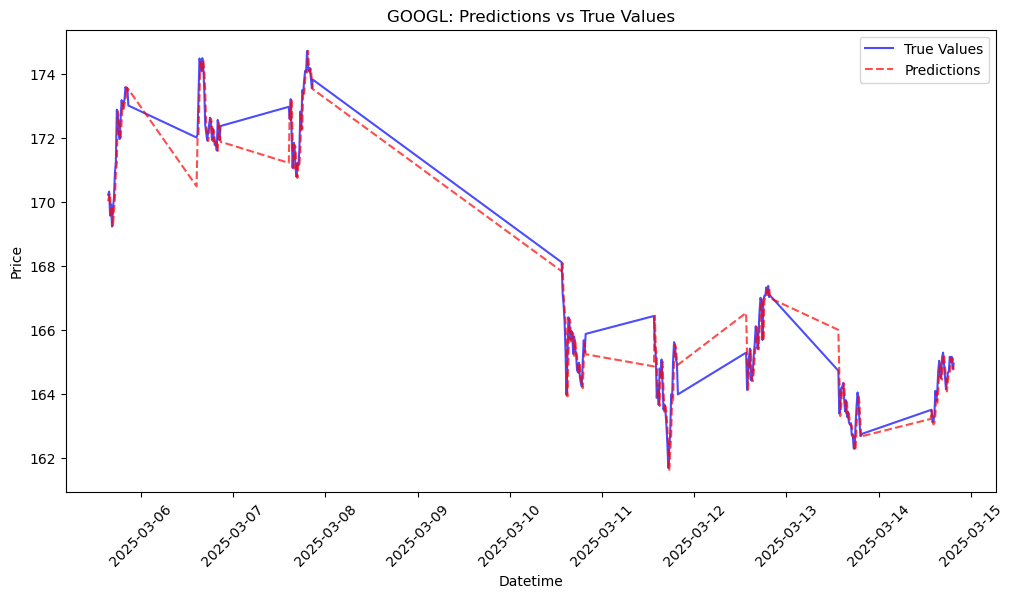

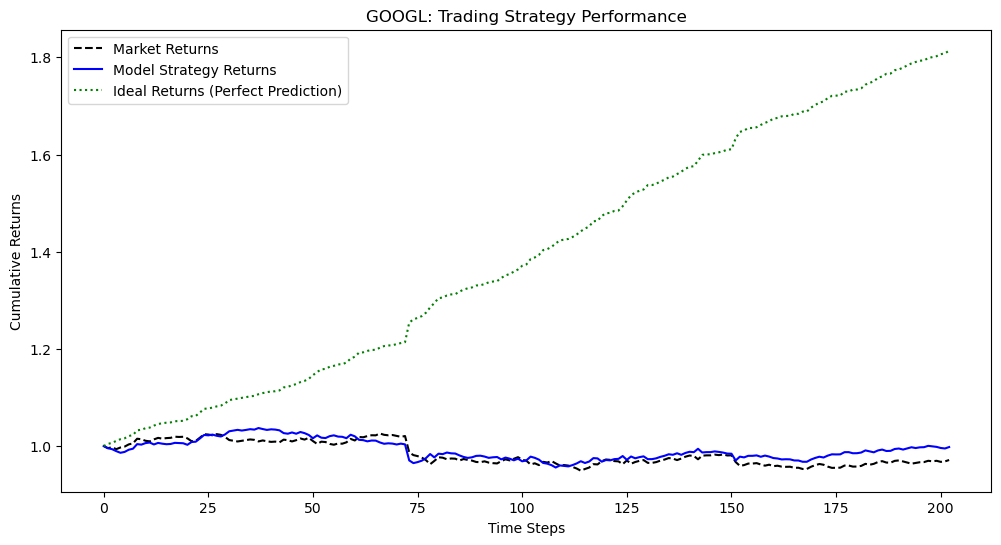


Results for NVDA from ./data_with_indicators\stock_prices_15m_with_indicators.csv:
  Market Return: 1.0436
  Model Return: 0.9732
  Ideal Return: 2.9852


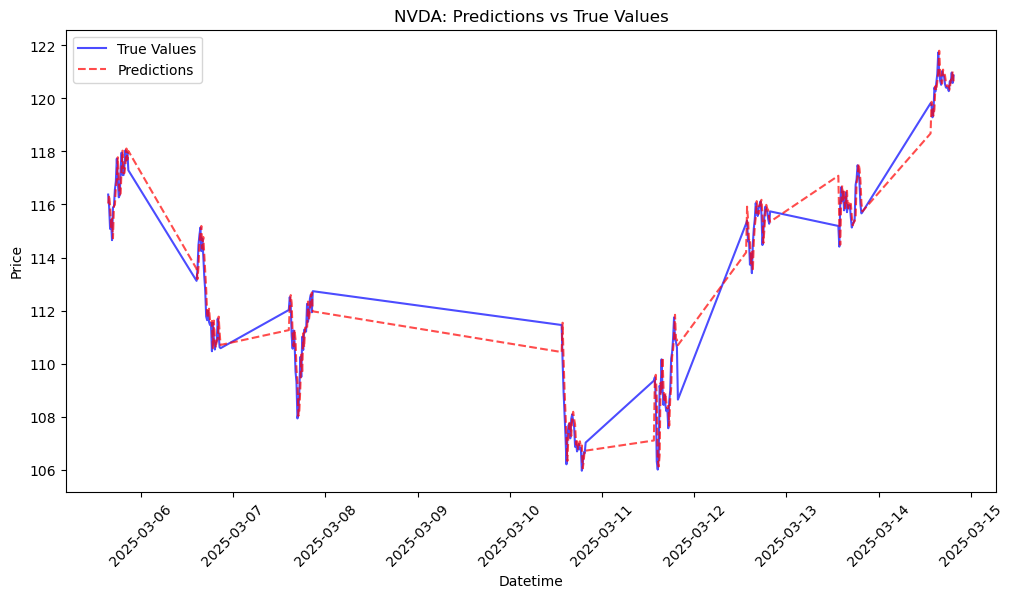

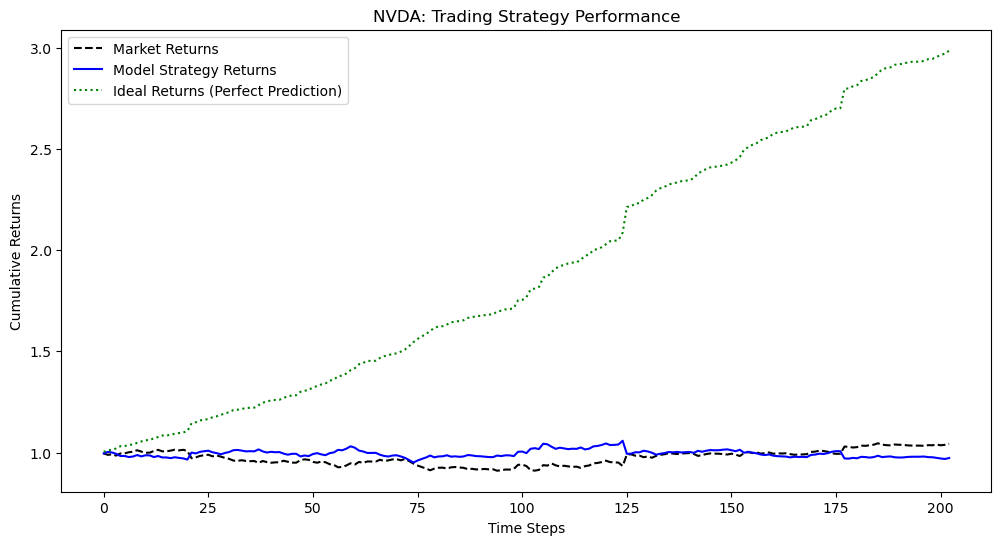


Results for TSLA from ./data_with_indicators\stock_prices_15m_with_indicators.csv:
  Market Return: 0.9159
  Model Return: 0.9730
  Ideal Return: 3.9597


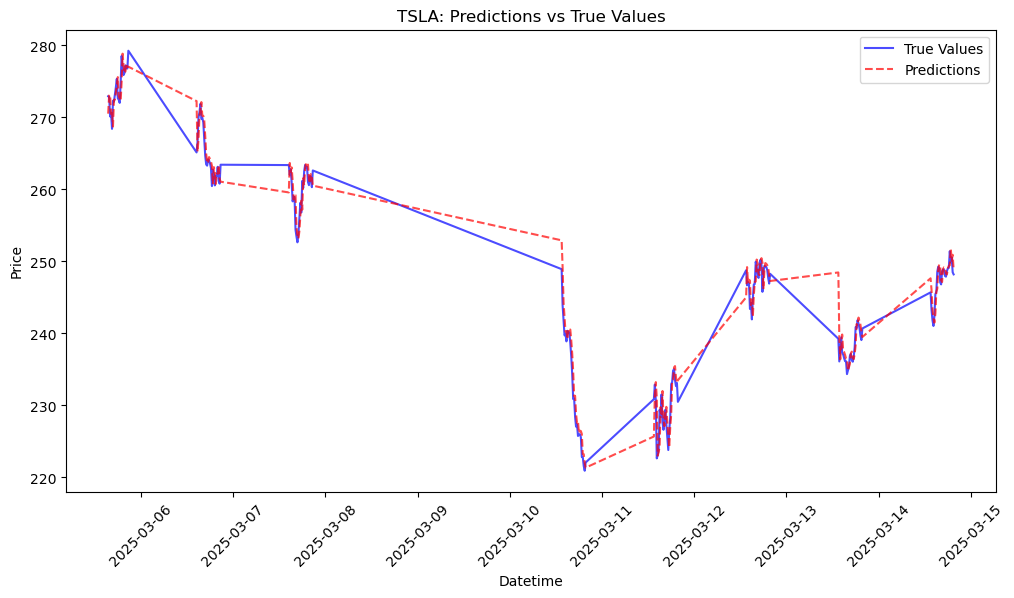

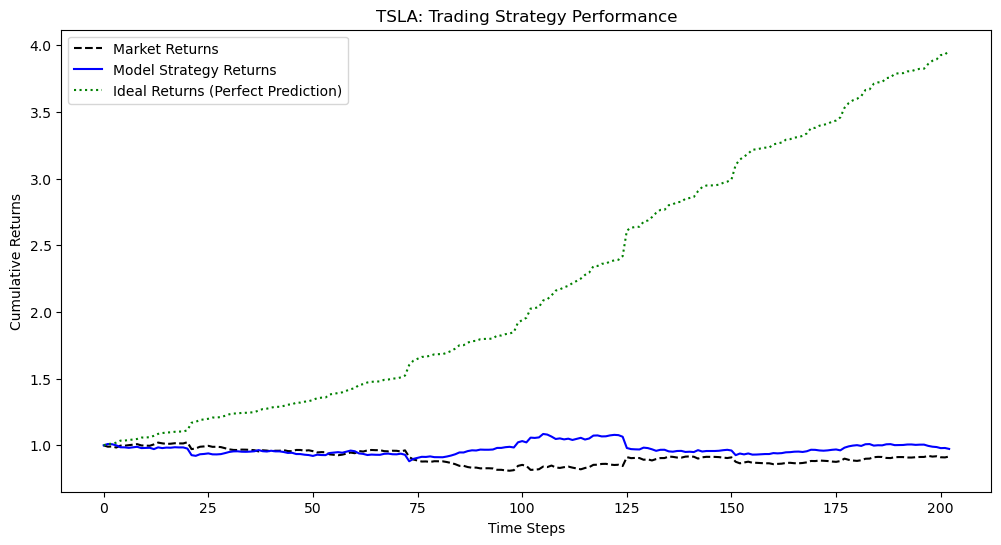


Results for AMZN from ./data_with_indicators\stock_prices_15m_with_indicators.csv:
  Market Return: 0.9610
  Model Return: 1.0489
  Ideal Return: 2.0791


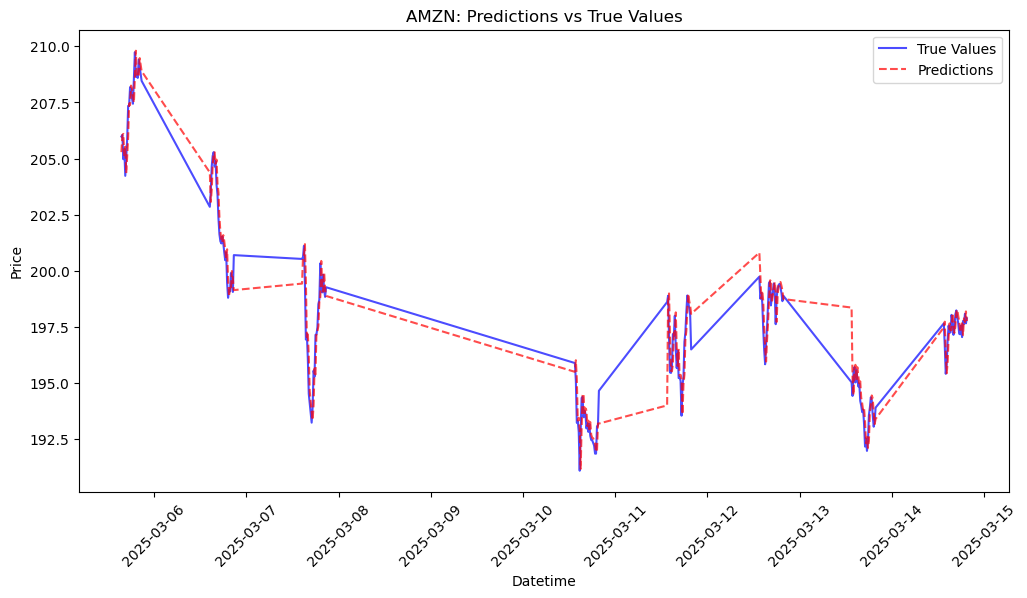

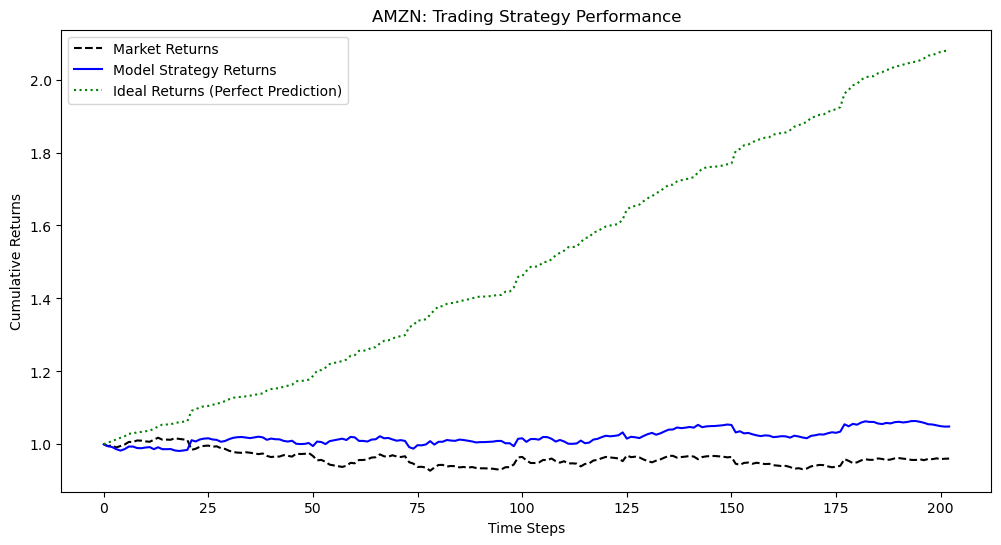


Results for META from ./data_with_indicators\stock_prices_15m_with_indicators.csv:
  Market Return: 0.9406
  Model Return: 1.1091
  Ideal Return: 2.3475


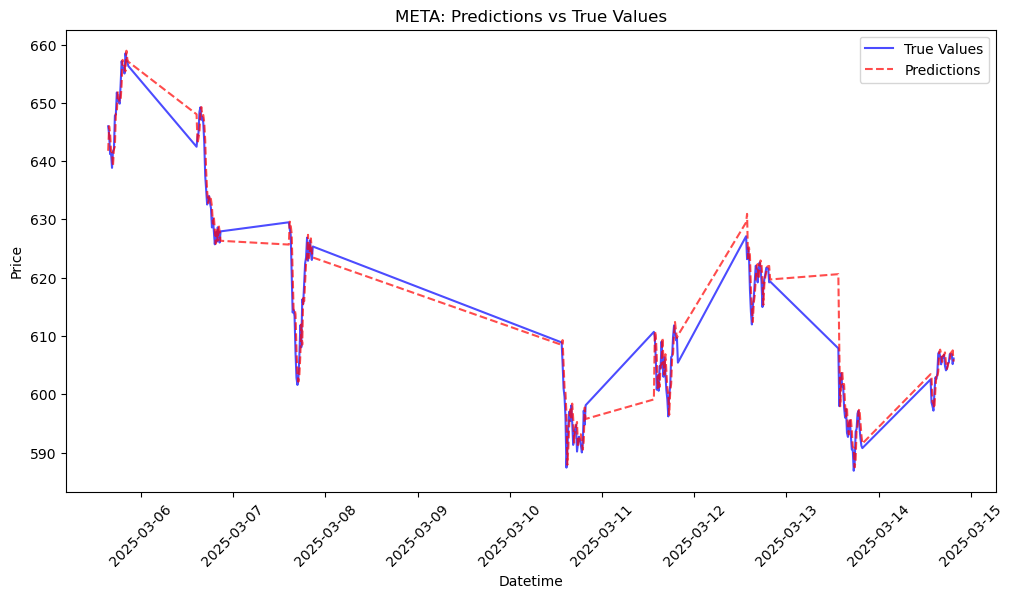

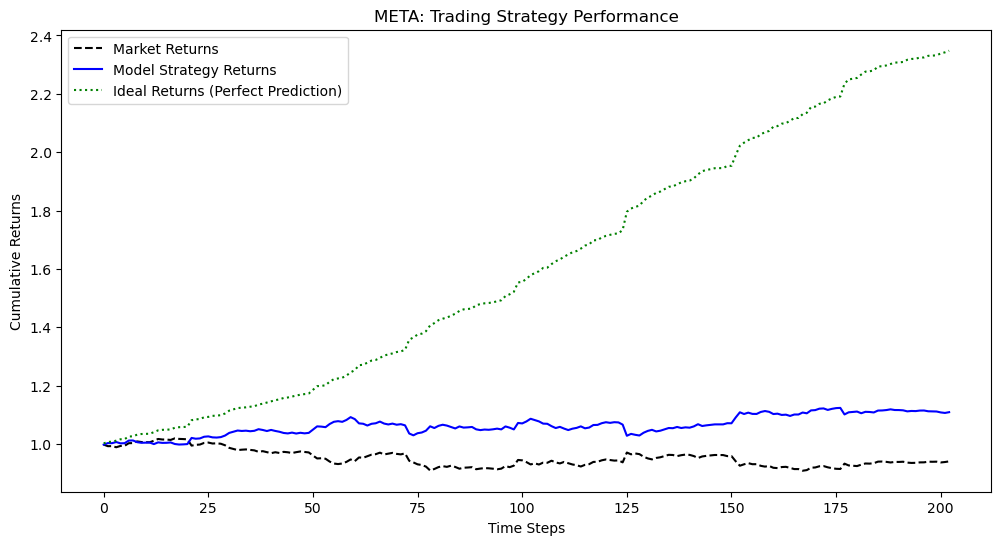


Results for AAPL from ./data_with_indicators\stock_prices_1m_with_indicators.csv:
  Market Return: 1.0069
  Model Return: 0.9903
  Ideal Return: 1.2630


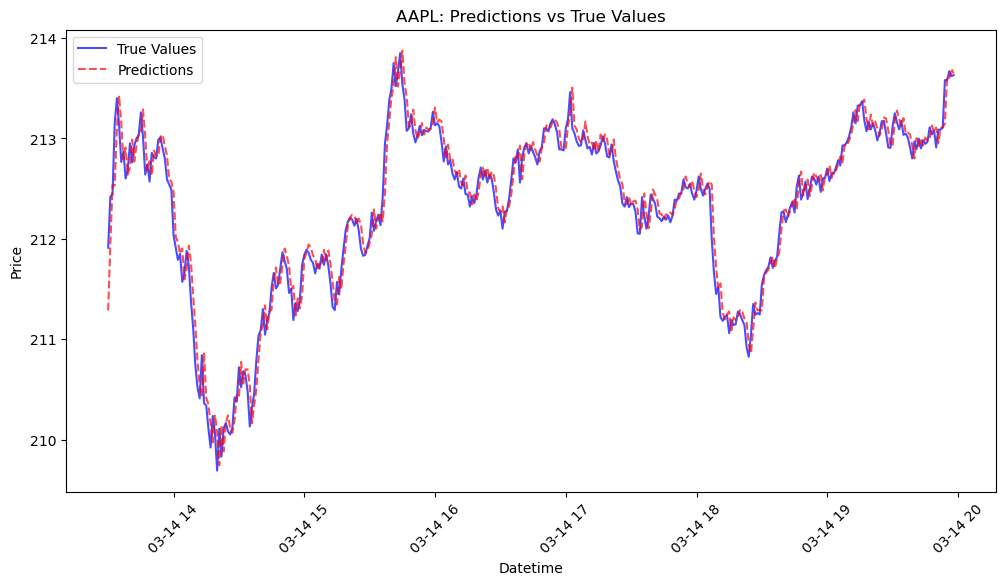

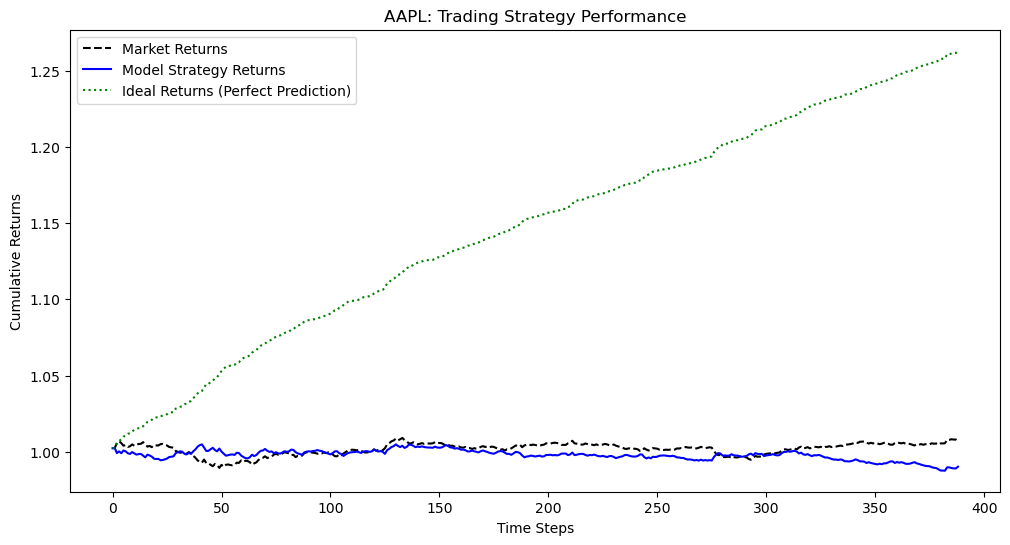


Results for MSFT from ./data_with_indicators\stock_prices_1m_with_indicators.csv:
  Market Return: 1.0195
  Model Return: 0.9996
  Ideal Return: 1.1746


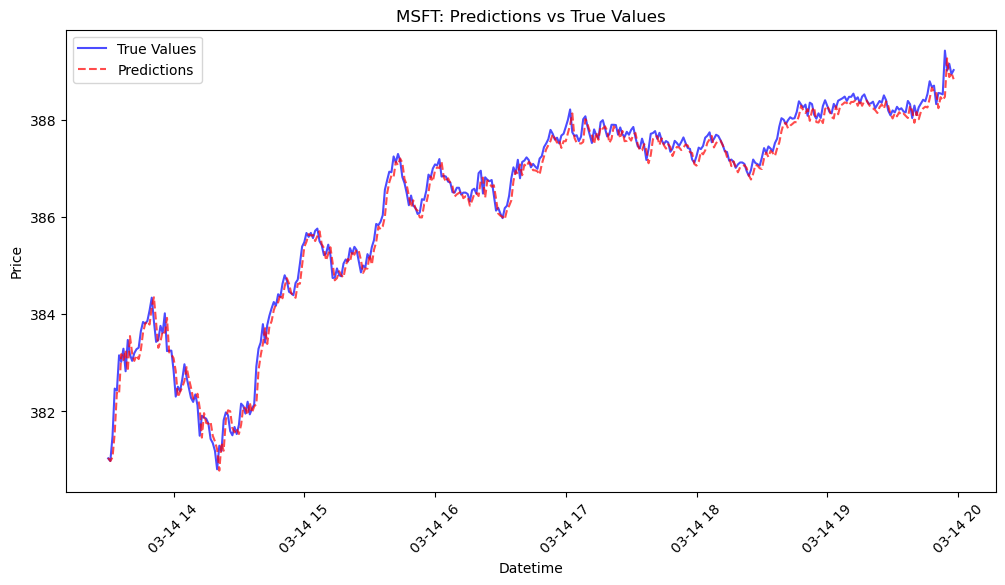

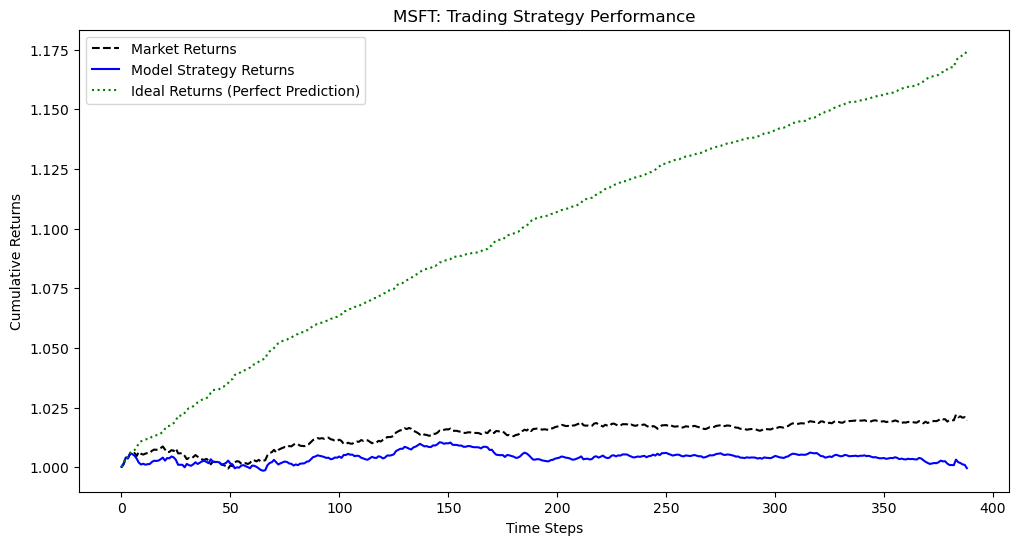


Results for GOOGL from ./data_with_indicators\stock_prices_1m_with_indicators.csv:
  Market Return: 1.0111
  Model Return: 0.9858
  Ideal Return: 1.2240


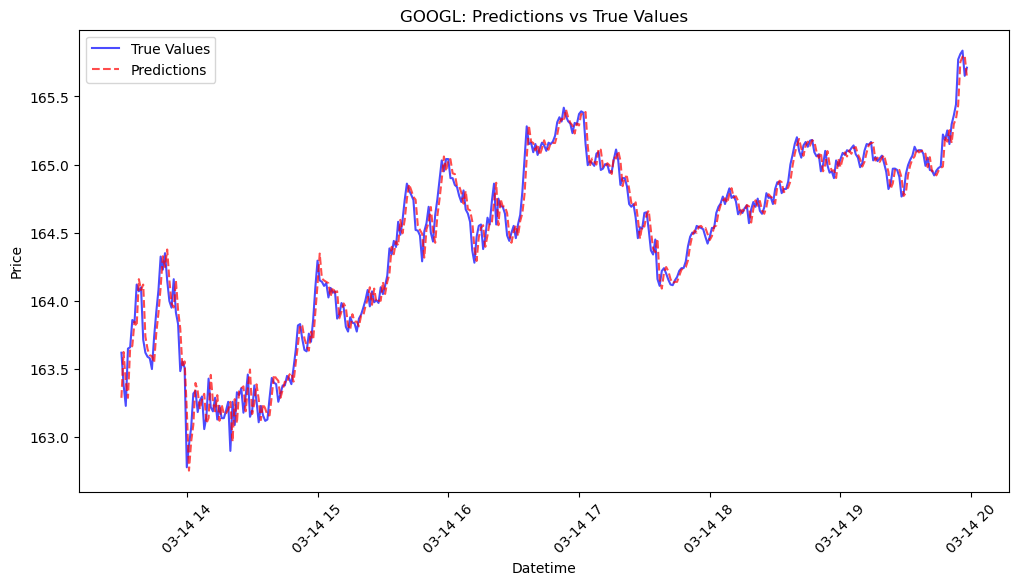

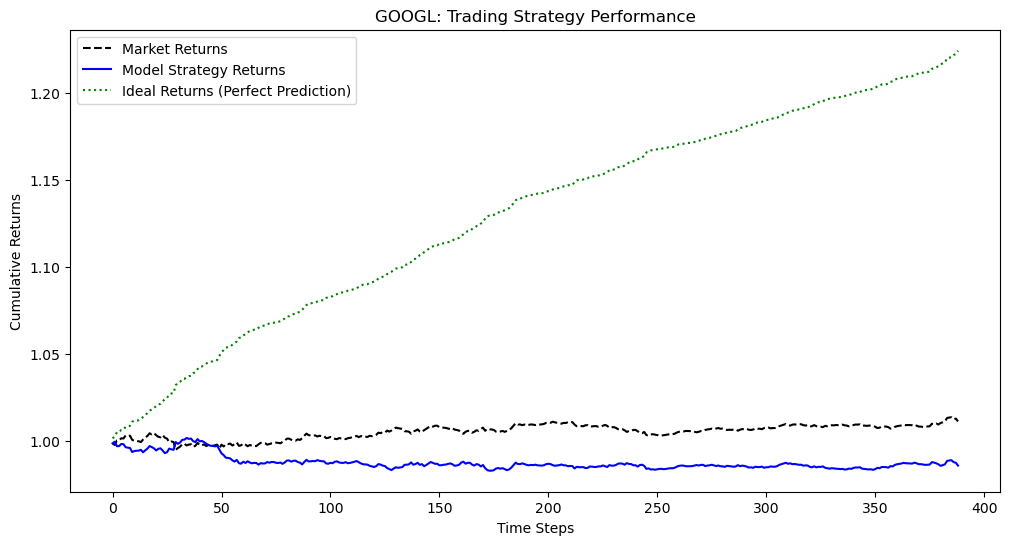


Results for NVDA from ./data_with_indicators\stock_prices_1m_with_indicators.csv:
  Market Return: 1.0230
  Model Return: 1.0117
  Ideal Return: 1.3744


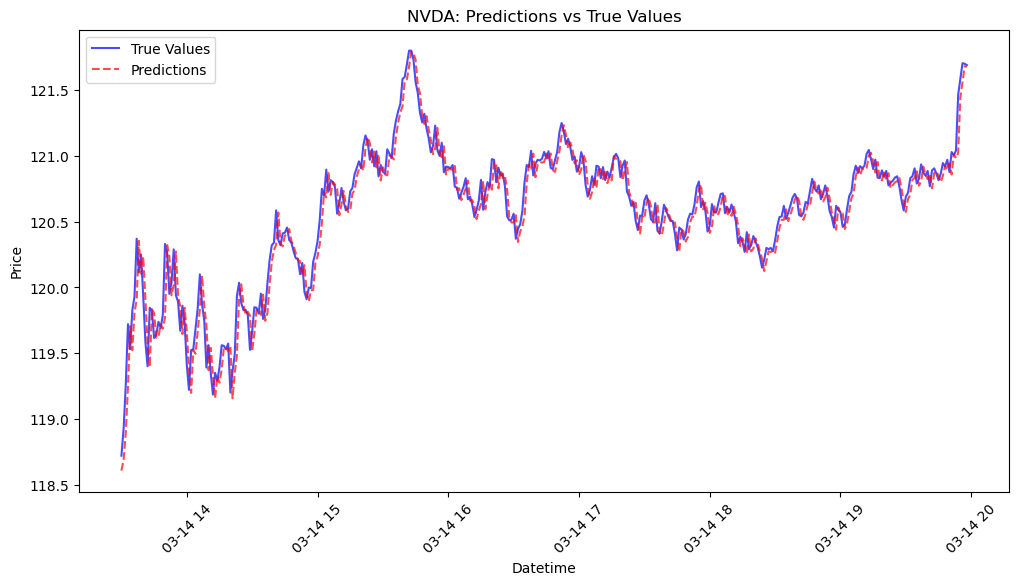

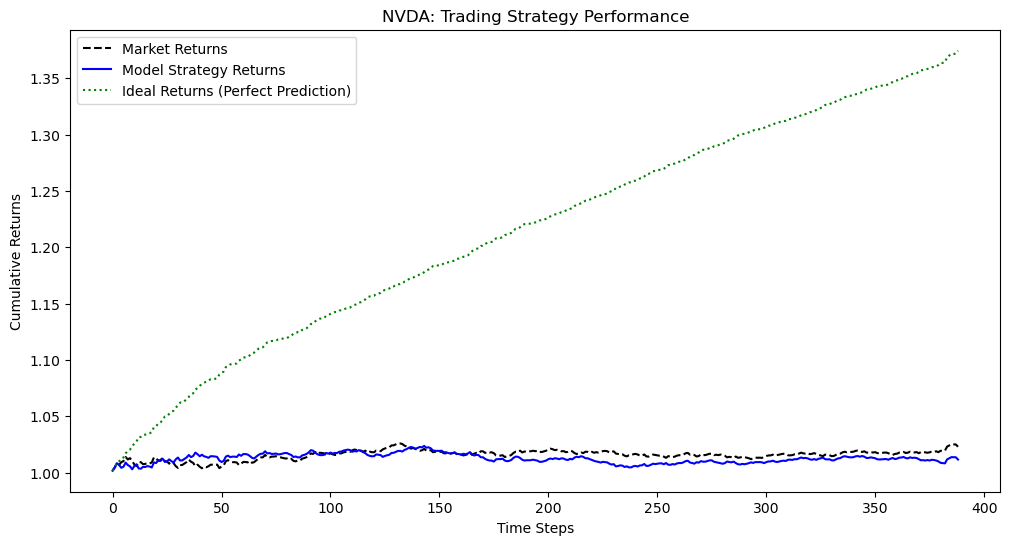


Results for TSLA from ./data_with_indicators\stock_prices_1m_with_indicators.csv:
  Market Return: 1.0121
  Model Return: 0.9535
  Ideal Return: 1.6171


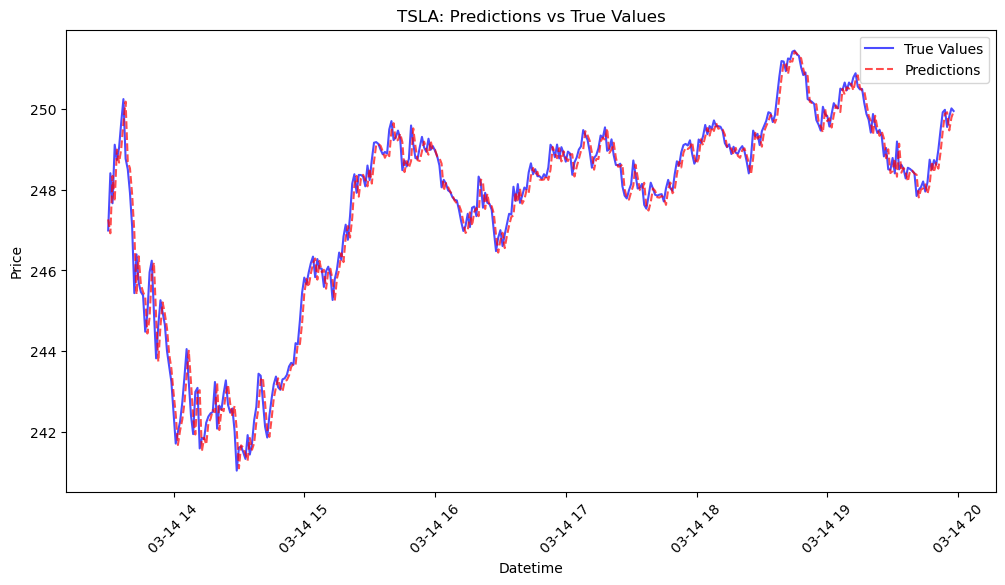

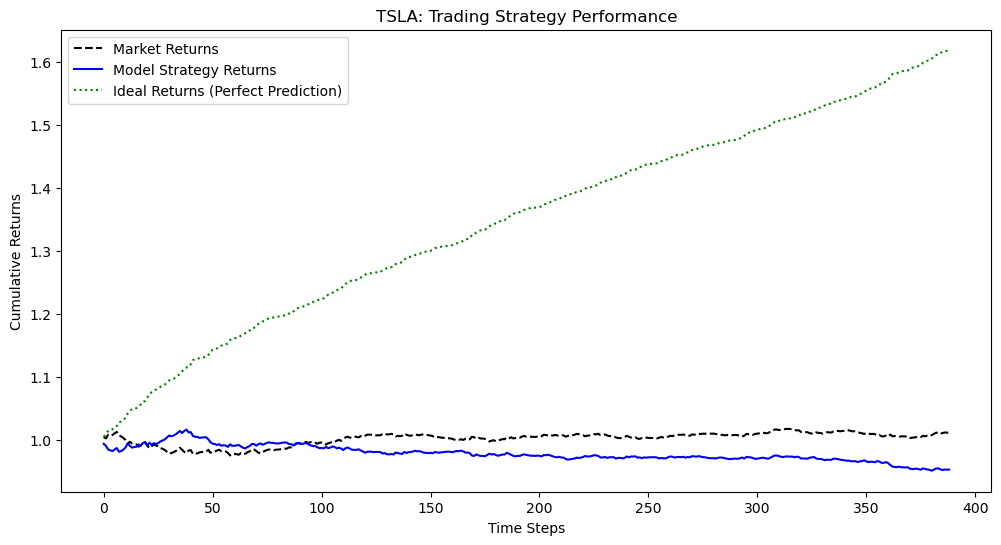


Results for AMZN from ./data_with_indicators\stock_prices_1m_with_indicators.csv:
  Market Return: 1.0025
  Model Return: 1.0077
  Ideal Return: 1.2514


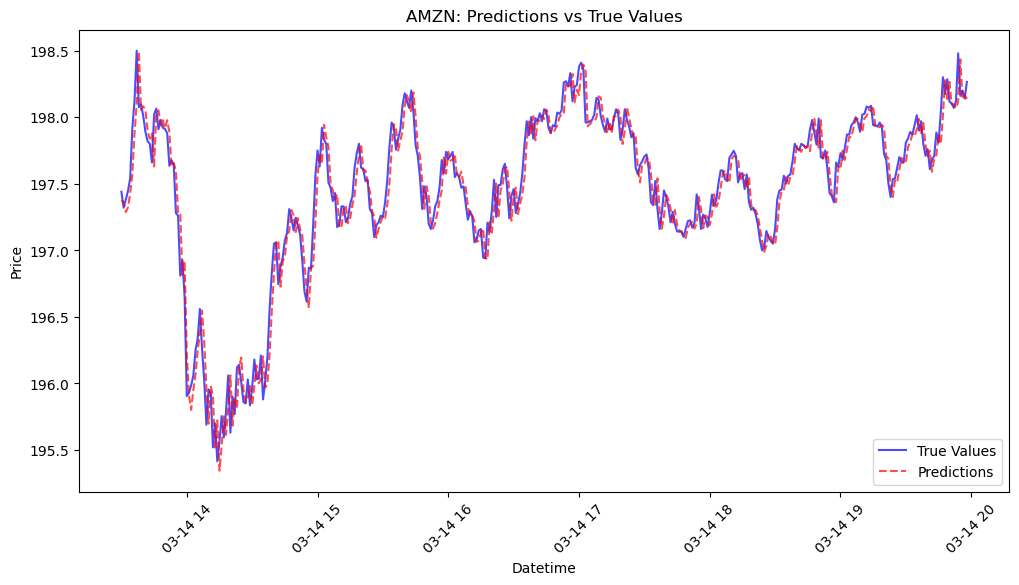

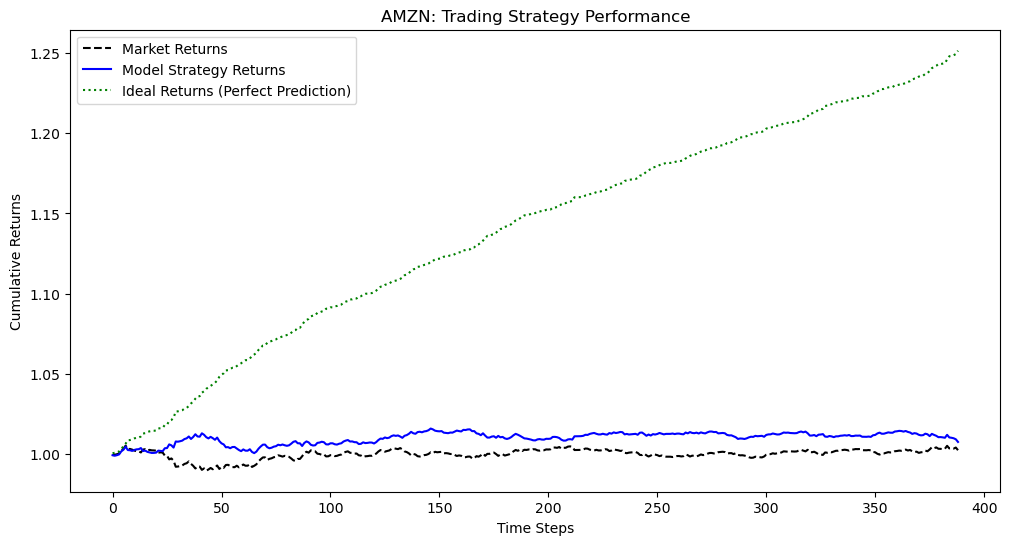


Results for META from ./data_with_indicators\stock_prices_1m_with_indicators.csv:
  Market Return: 1.0076
  Model Return: 1.0050
  Ideal Return: 1.2932


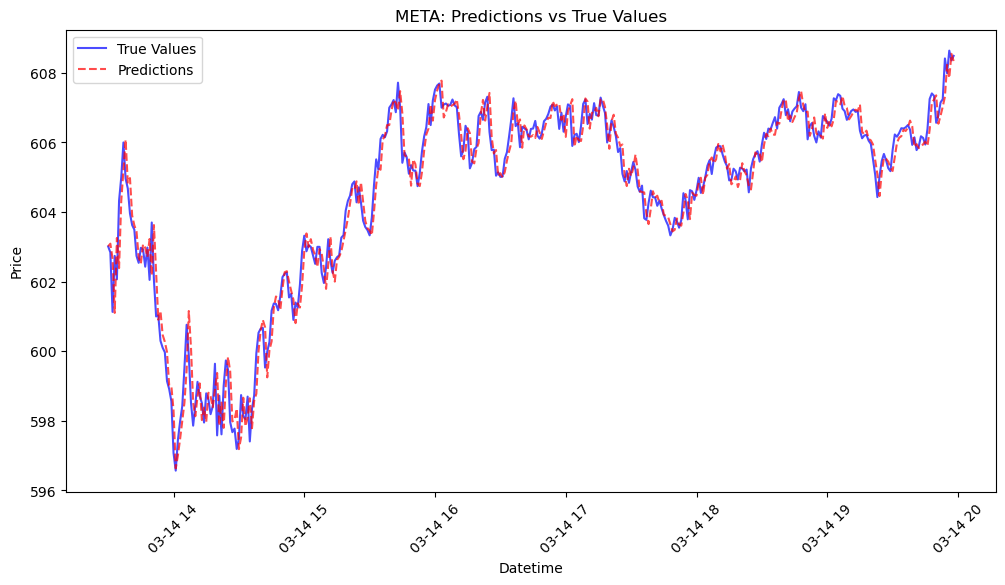

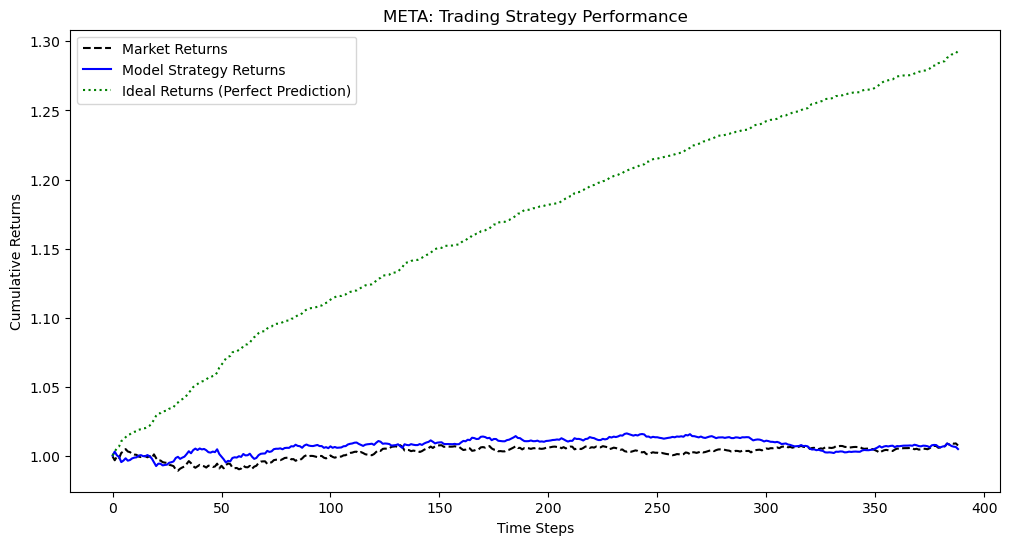


Results for AAPL from ./data_with_indicators\stock_prices_2m_with_indicators.csv:
  Market Return: 0.9068
  Model Return: 1.1750
  Ideal Return: 3.5070


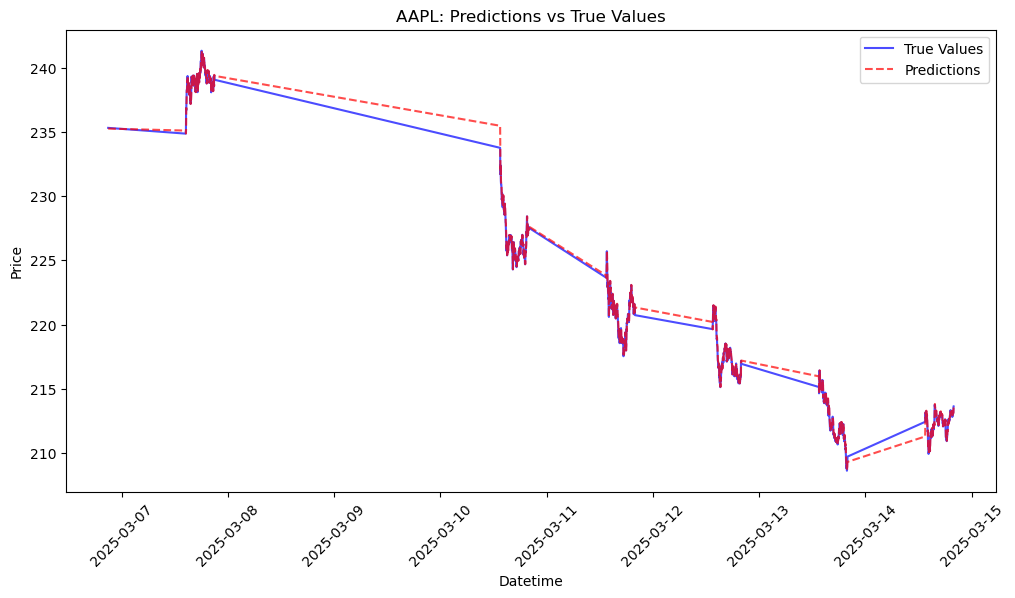

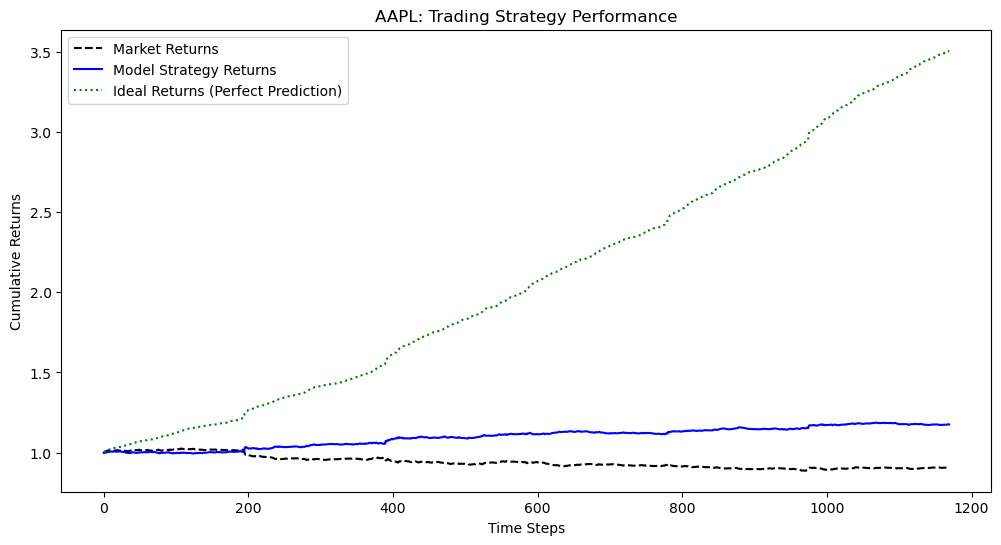


Results for MSFT from ./data_with_indicators\stock_prices_2m_with_indicators.csv:
  Market Return: 0.9785
  Model Return: 0.9982
  Ideal Return: 2.8018


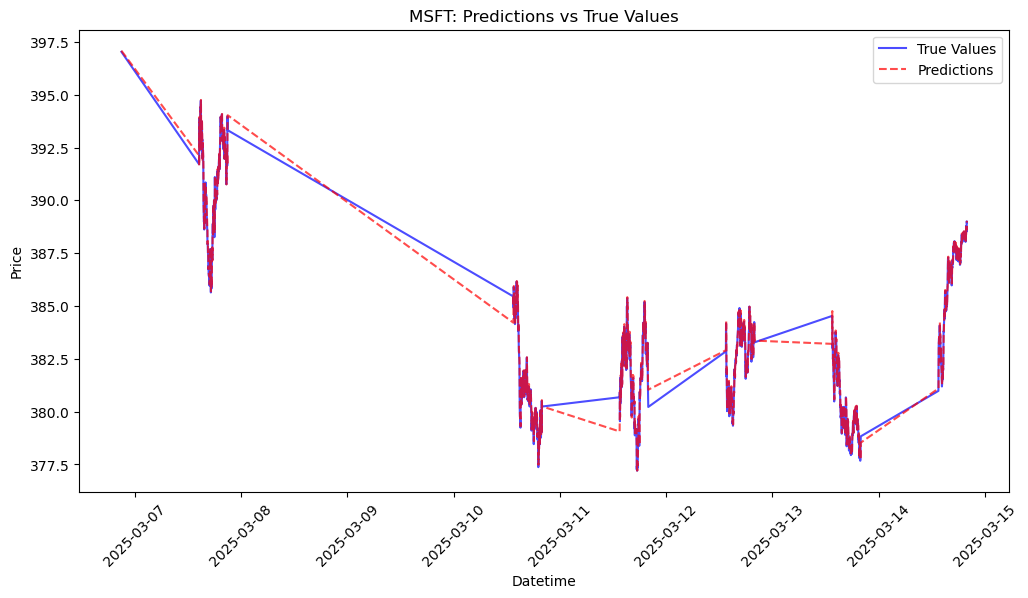

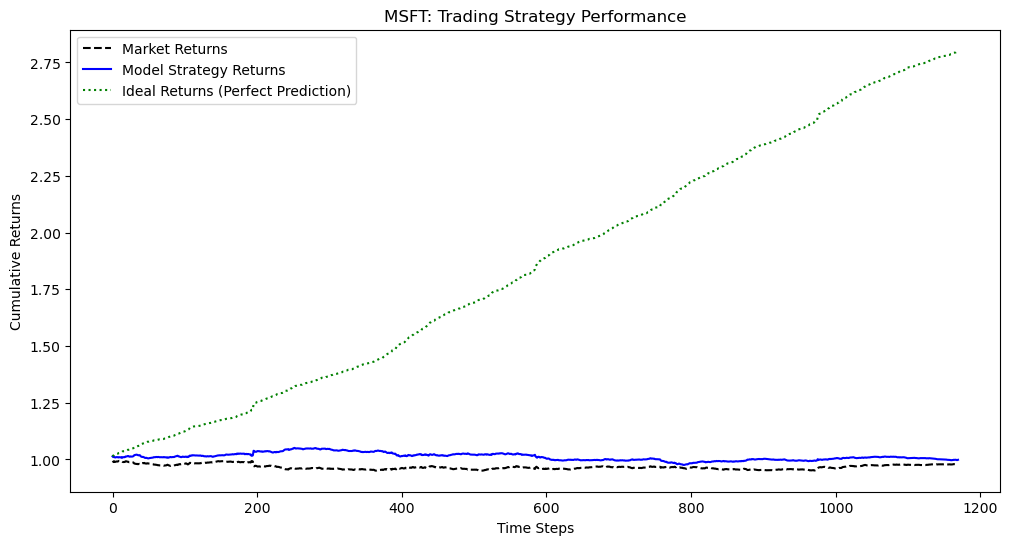


Results for GOOGL from ./data_with_indicators\stock_prices_2m_with_indicators.csv:
  Market Return: 0.9647
  Model Return: 1.0610
  Ideal Return: 3.5074


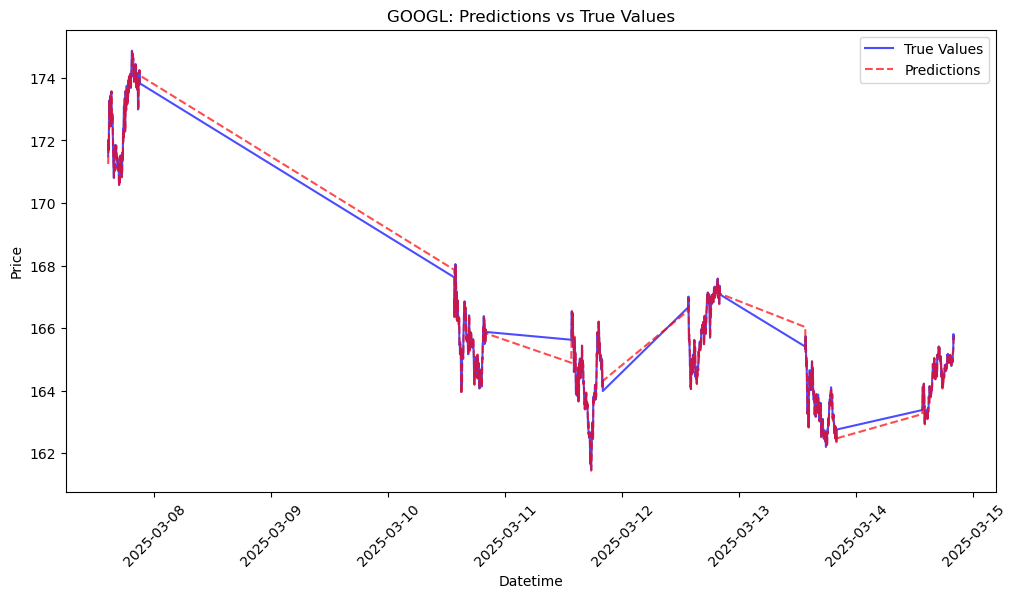

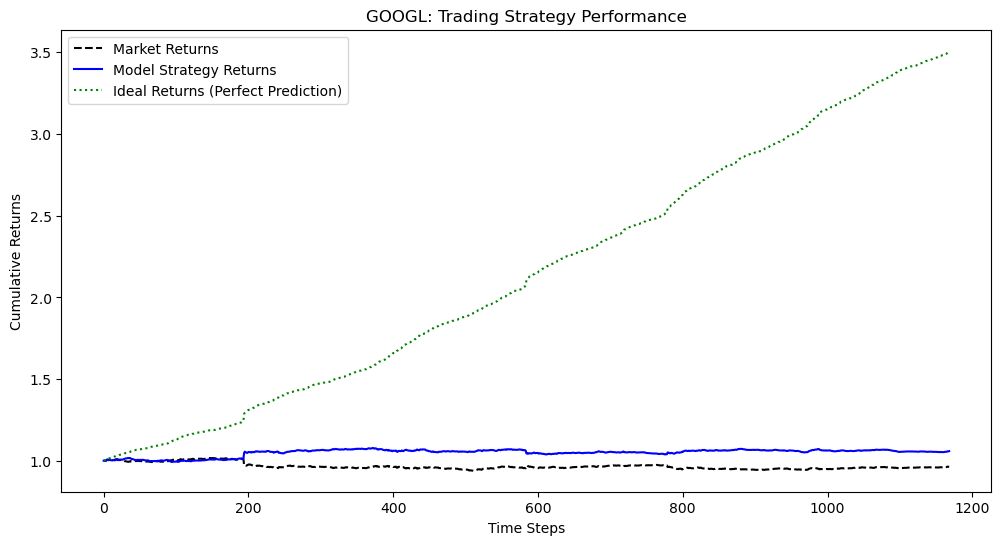


Results for NVDA from ./data_with_indicators\stock_prices_2m_with_indicators.csv:
  Market Return: 1.0983
  Model Return: 0.9721
  Ideal Return: 10.5985


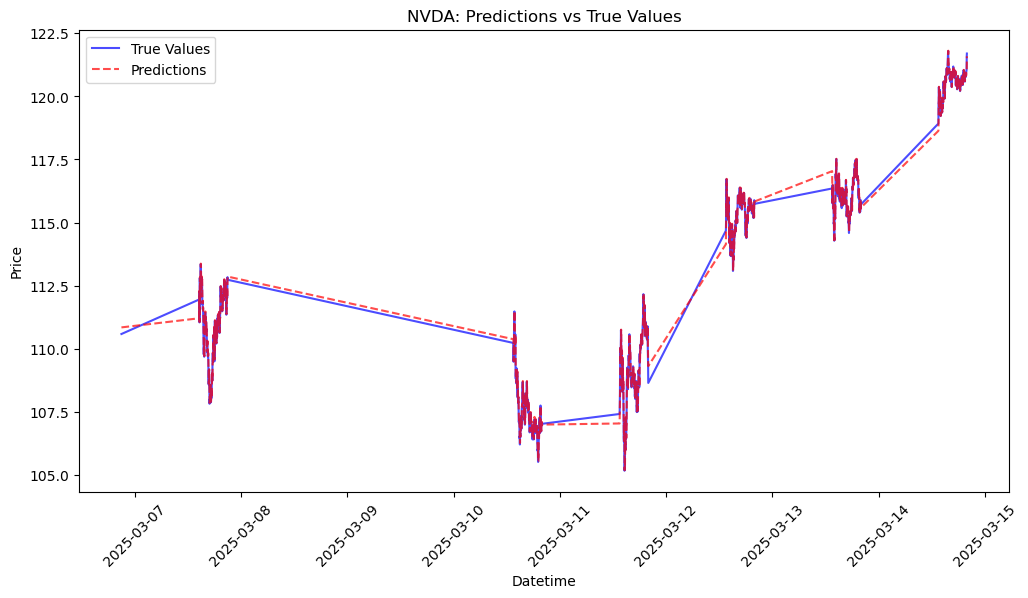

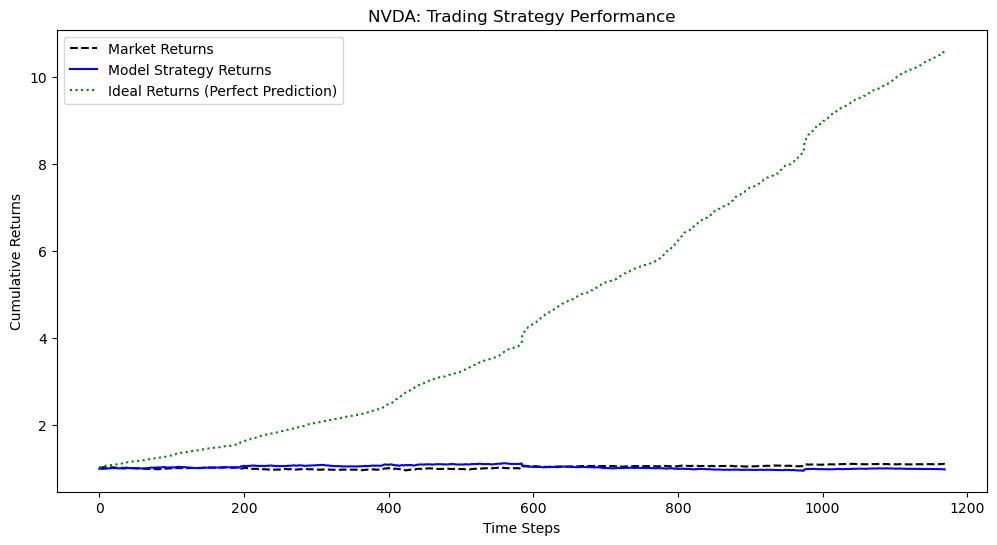


Results for TSLA from ./data_with_indicators\stock_prices_2m_with_indicators.csv:
  Market Return: 0.9489
  Model Return: 1.1143
  Ideal Return: 21.0543


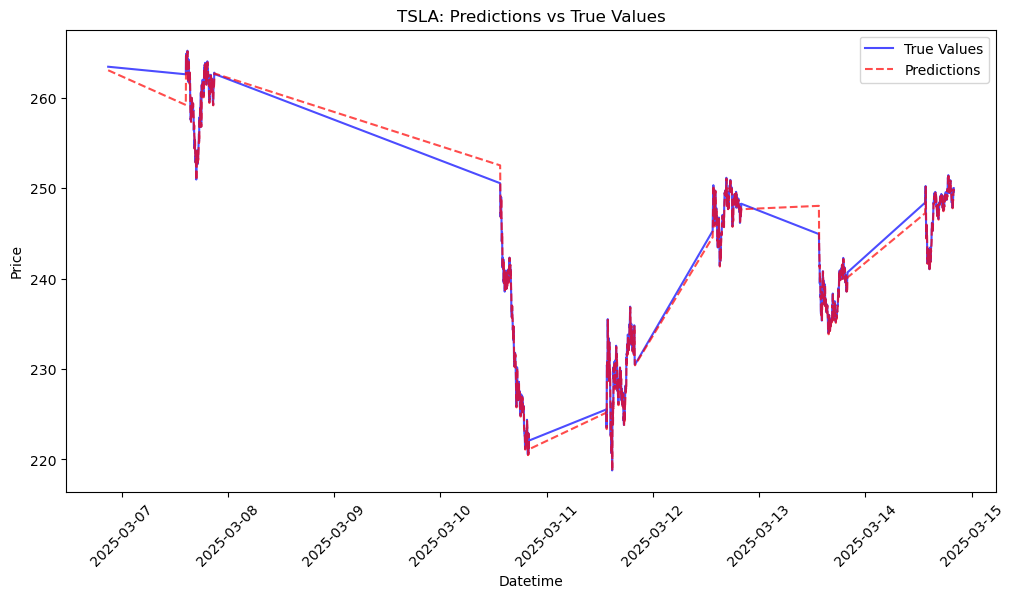

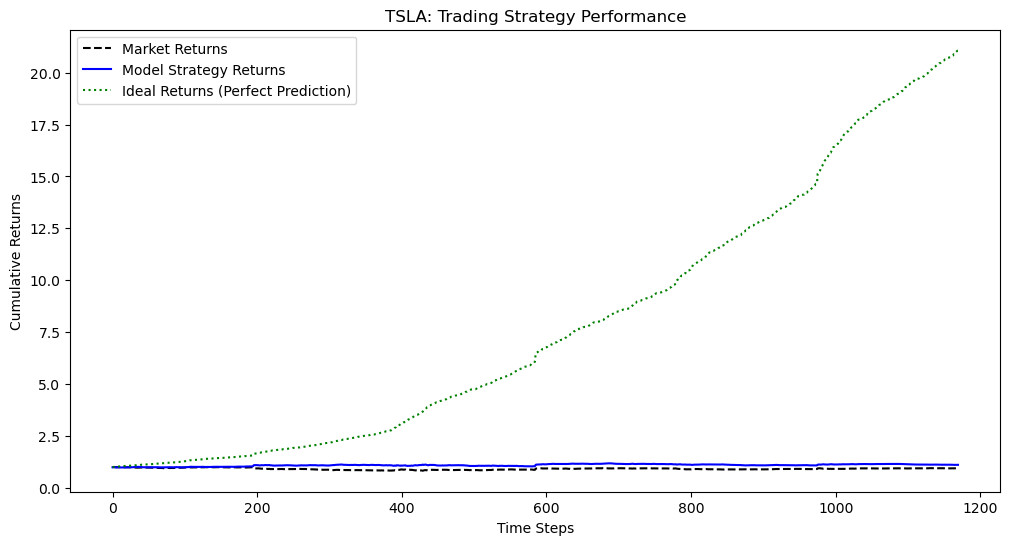


Results for AMZN from ./data_with_indicators\stock_prices_2m_with_indicators.csv:
  Market Return: 0.9890
  Model Return: 1.0759
  Ideal Return: 4.2014


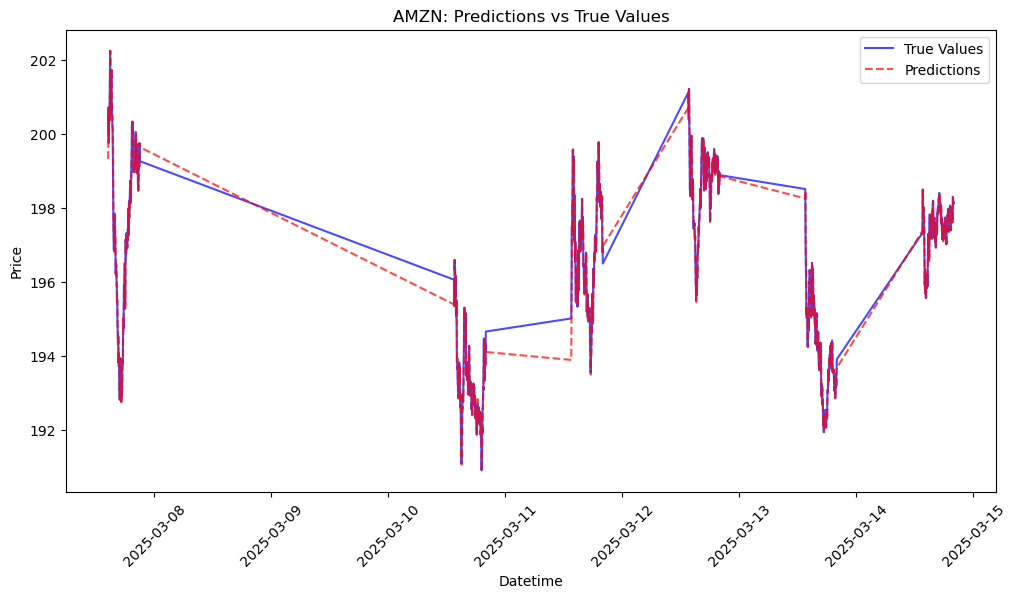

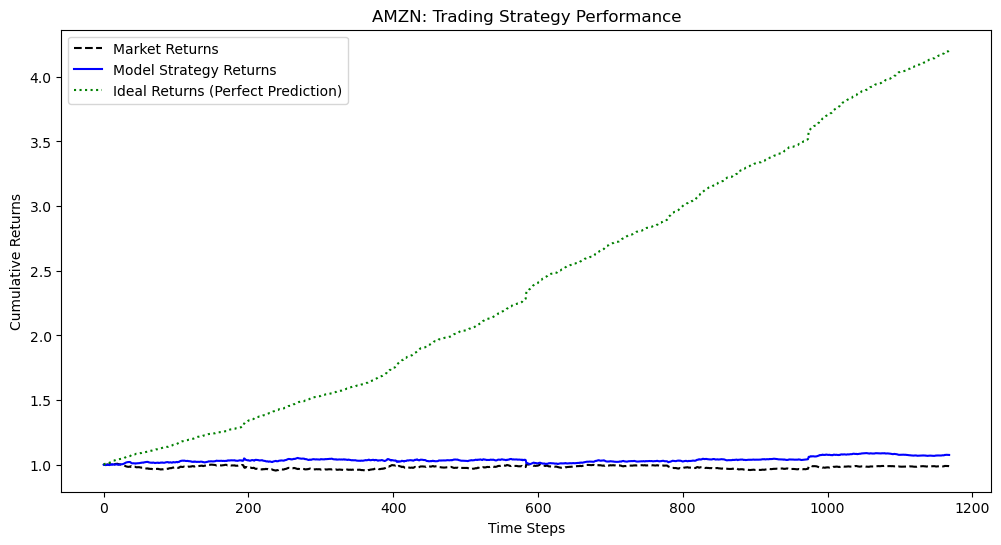


Results for META from ./data_with_indicators\stock_prices_2m_with_indicators.csv:
  Market Return: 0.9676
  Model Return: 1.0606
  Ideal Return: 5.5346


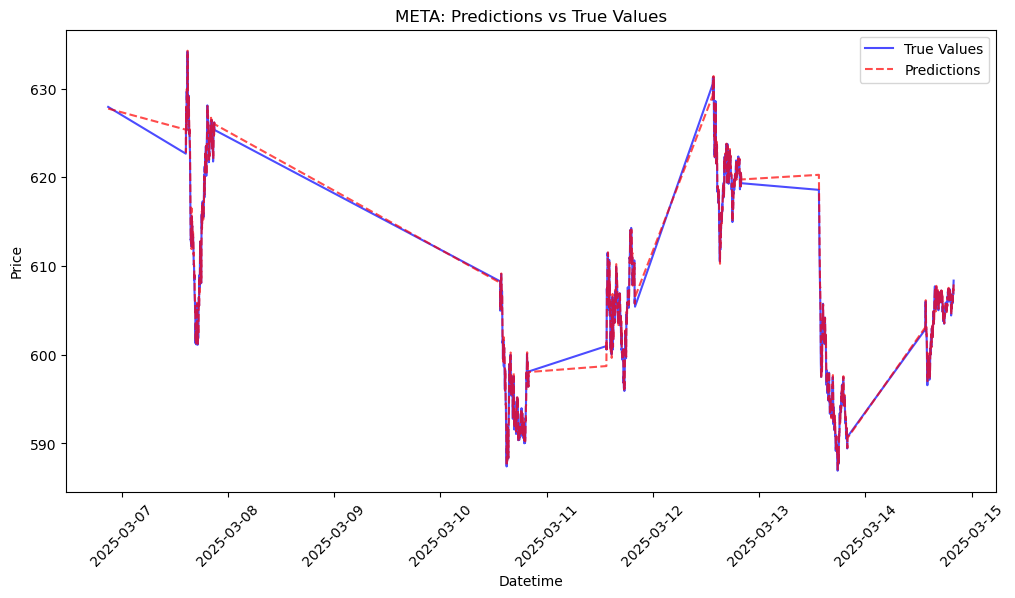

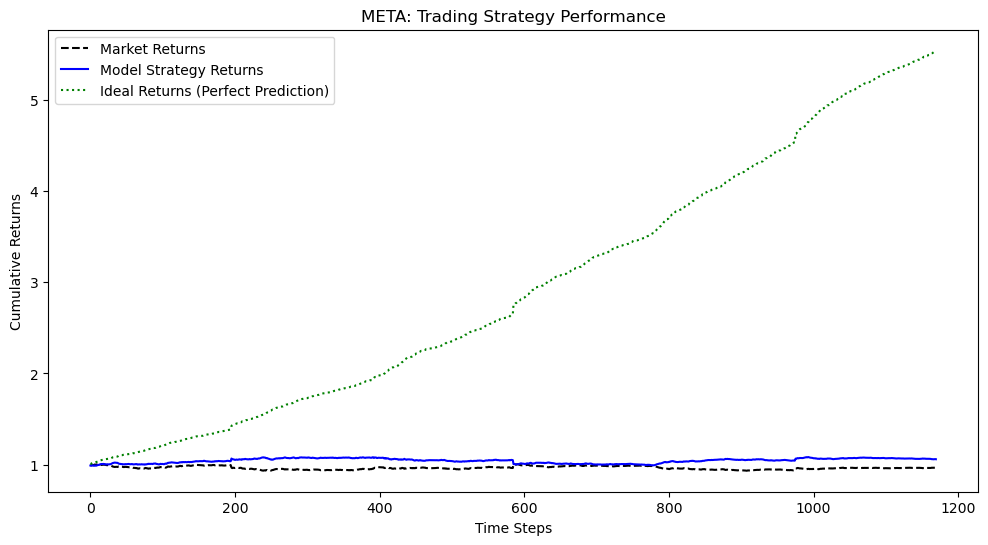


Results for AAPL from ./data_with_indicators\stock_prices_5m_with_indicators.csv:
  Market Return: 0.9176
  Model Return: 1.0563
  Ideal Return: 2.9966


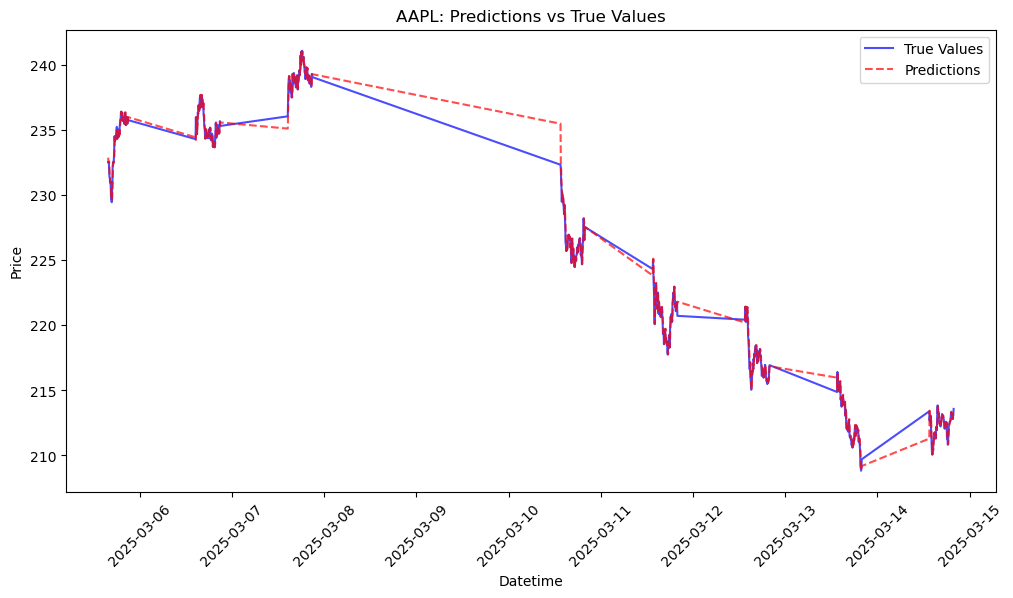

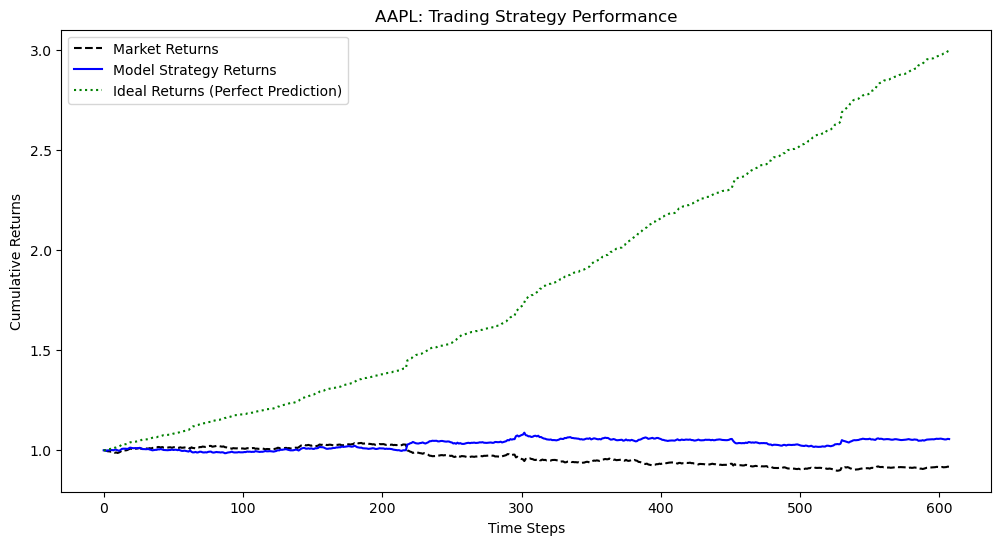


Results for MSFT from ./data_with_indicators\stock_prices_5m_with_indicators.csv:
  Market Return: 0.9906
  Model Return: 0.9259
  Ideal Return: 2.3594


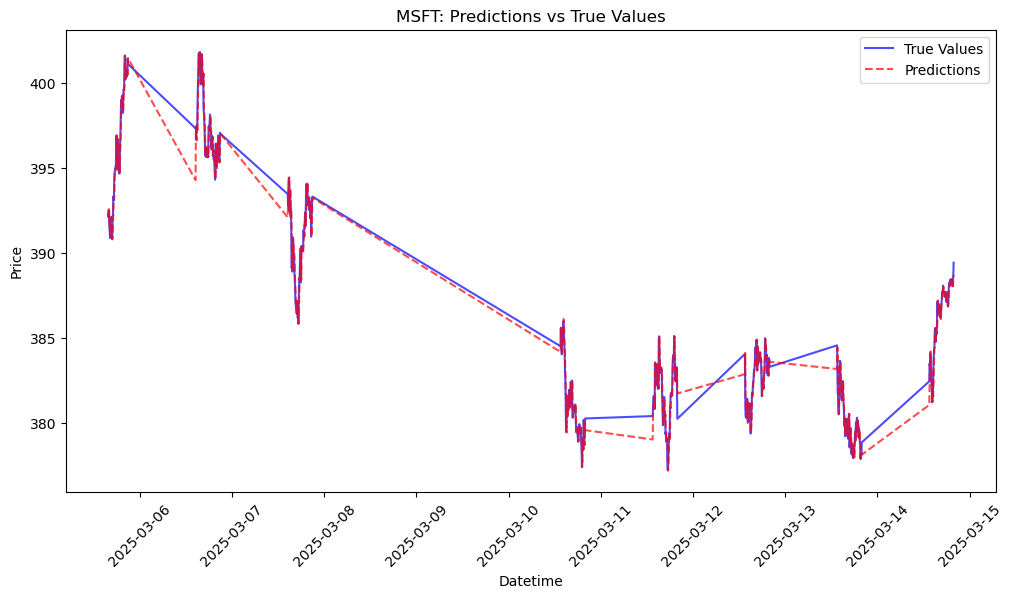

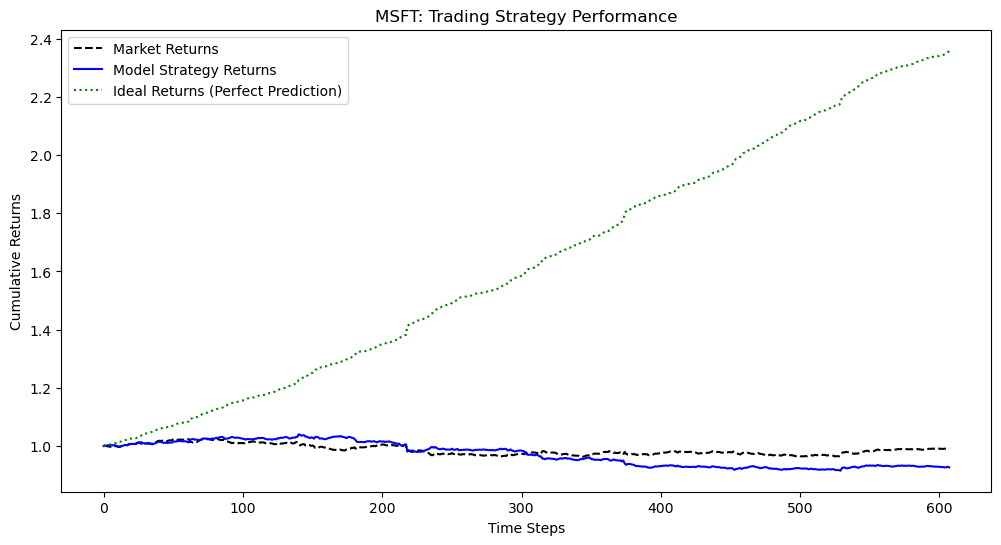


Results for GOOGL from ./data_with_indicators\stock_prices_5m_with_indicators.csv:
  Market Return: 0.9707
  Model Return: 0.9992
  Ideal Return: 2.9071


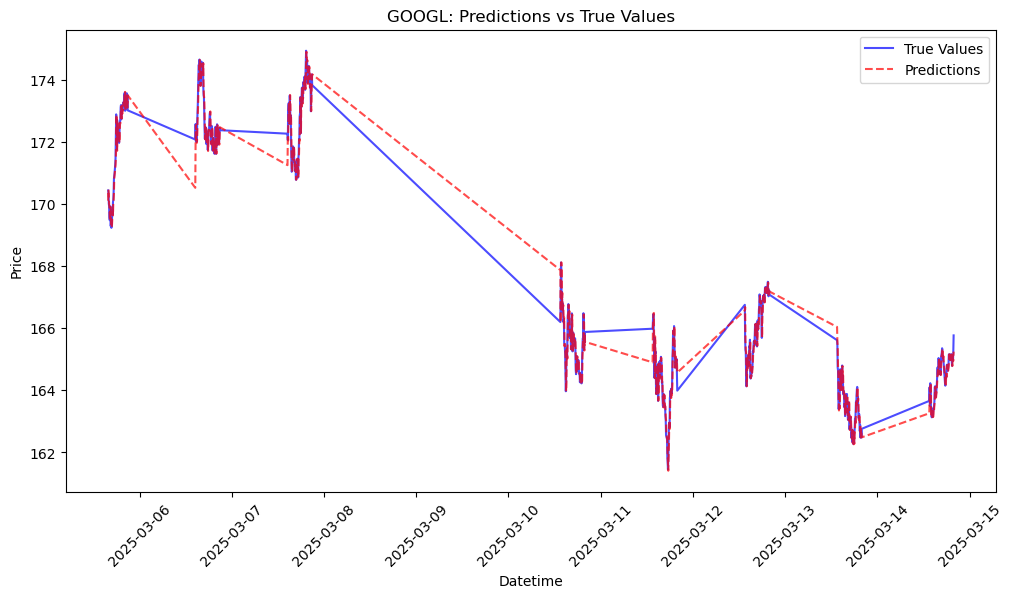

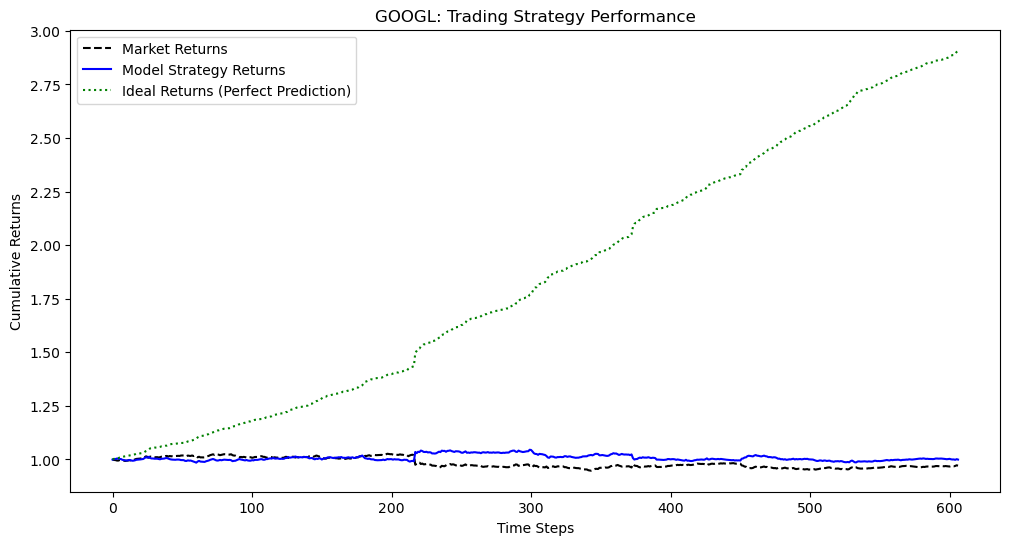


Results for NVDA from ./data_with_indicators\stock_prices_5m_with_indicators.csv:
  Market Return: 1.0489
  Model Return: 0.7291
  Ideal Return: 7.4880


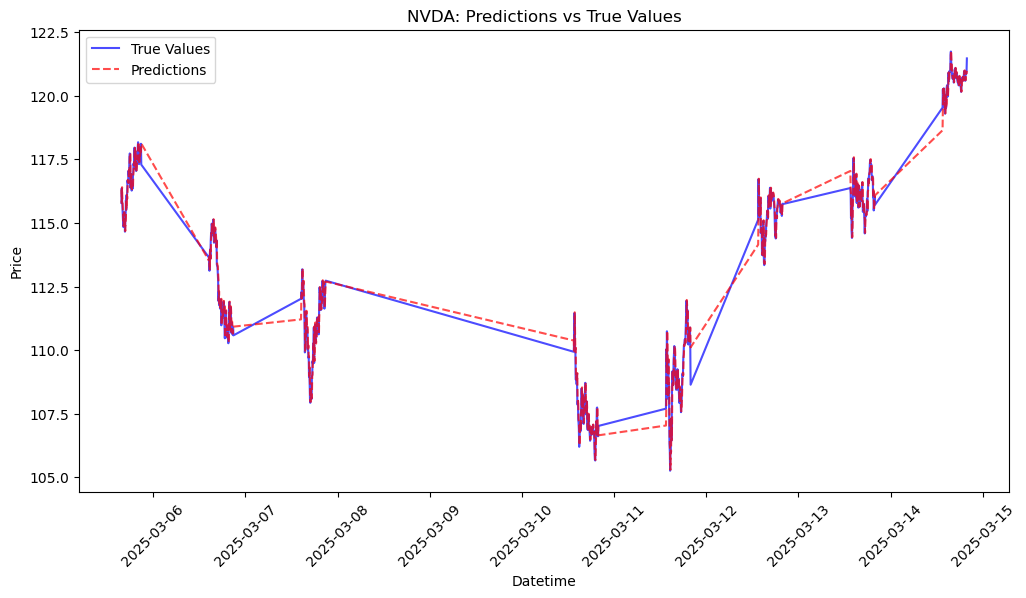

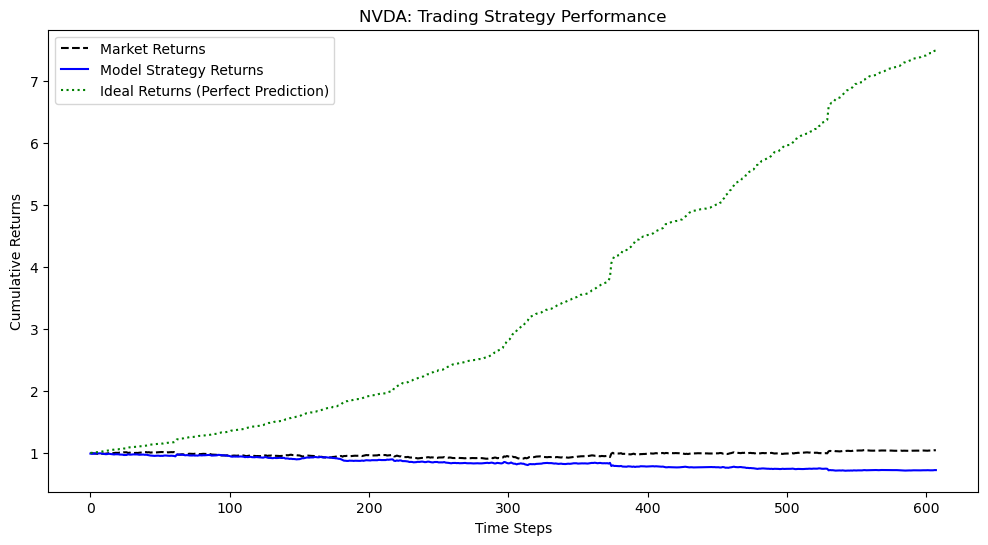


Results for TSLA from ./data_with_indicators\stock_prices_5m_with_indicators.csv:
  Market Return: 0.9191
  Model Return: 0.8032
  Ideal Return: 13.0606


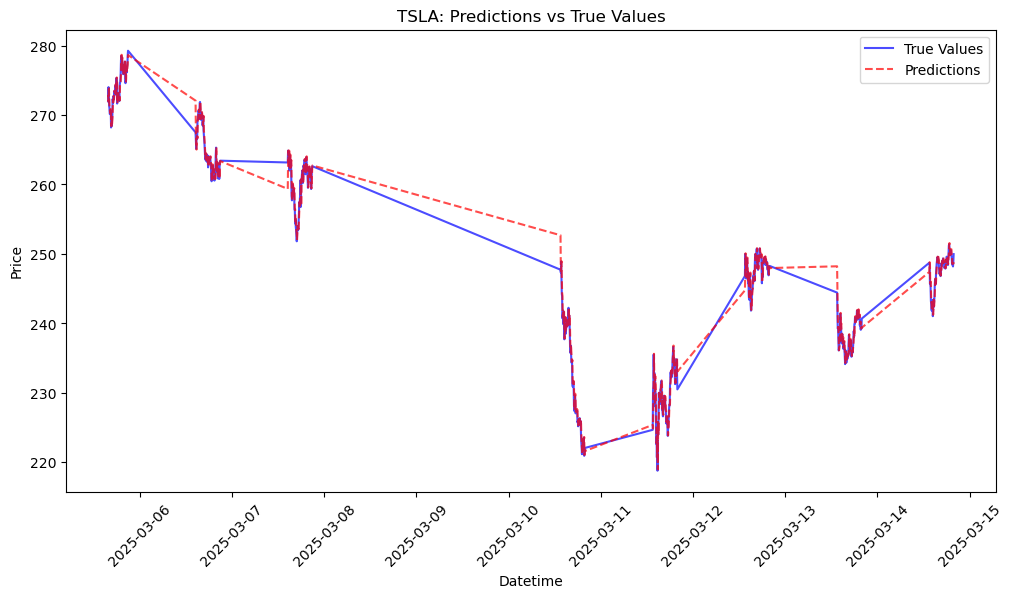

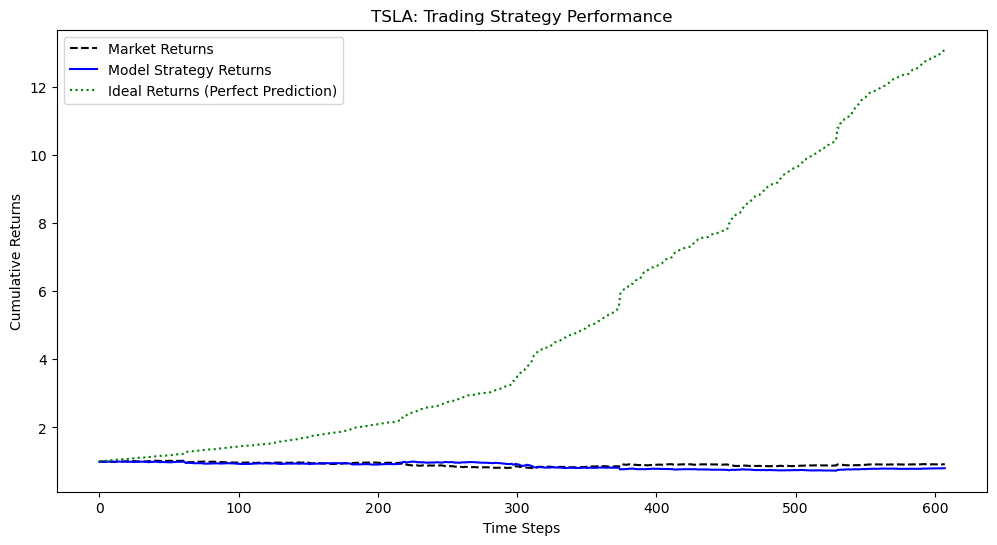


Results for AMZN from ./data_with_indicators\stock_prices_5m_with_indicators.csv:
  Market Return: 0.9620
  Model Return: 1.0350
  Ideal Return: 3.5711


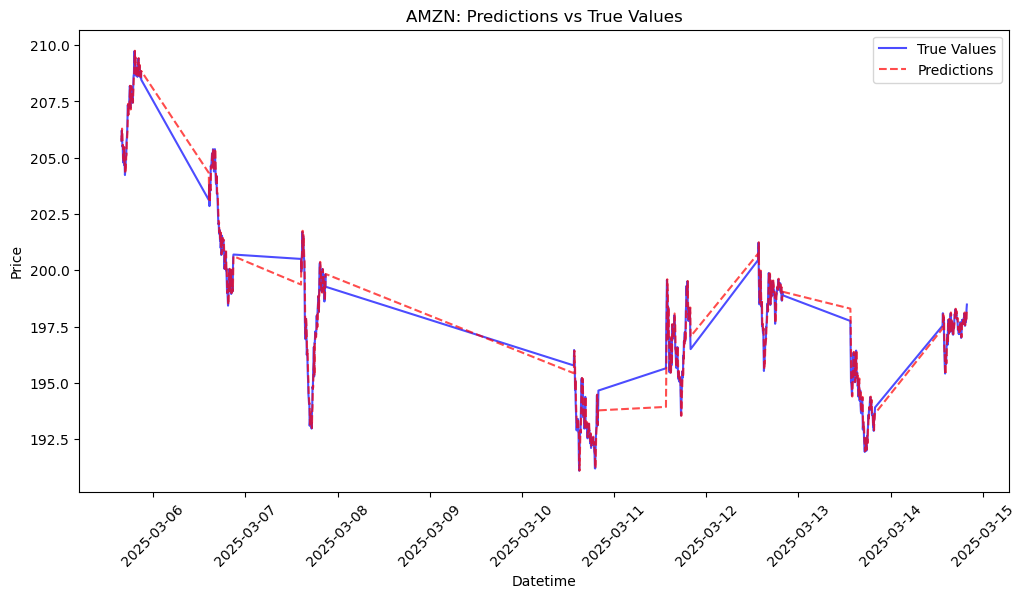

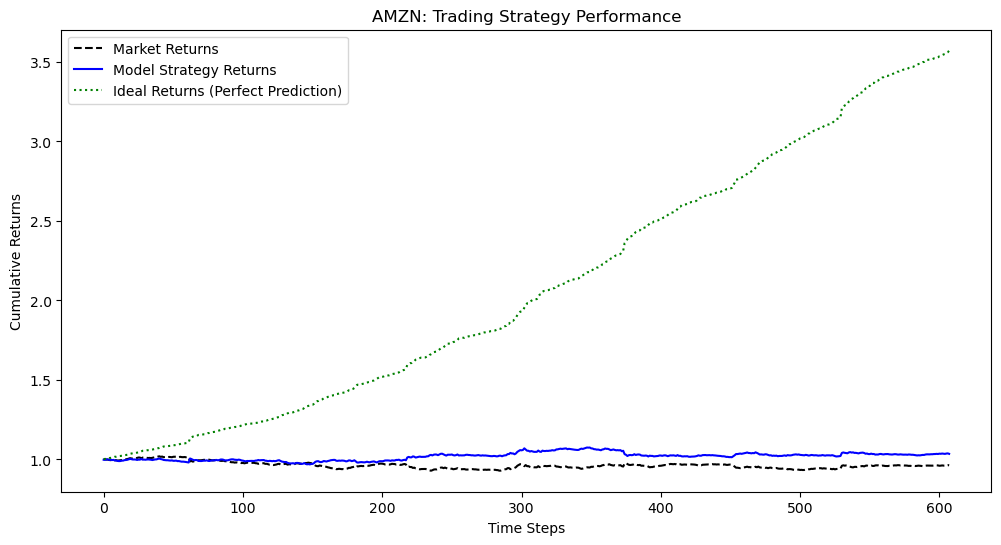


Results for META from ./data_with_indicators\stock_prices_5m_with_indicators.csv:
  Market Return: 0.9437
  Model Return: 1.0764
  Ideal Return: 4.1303


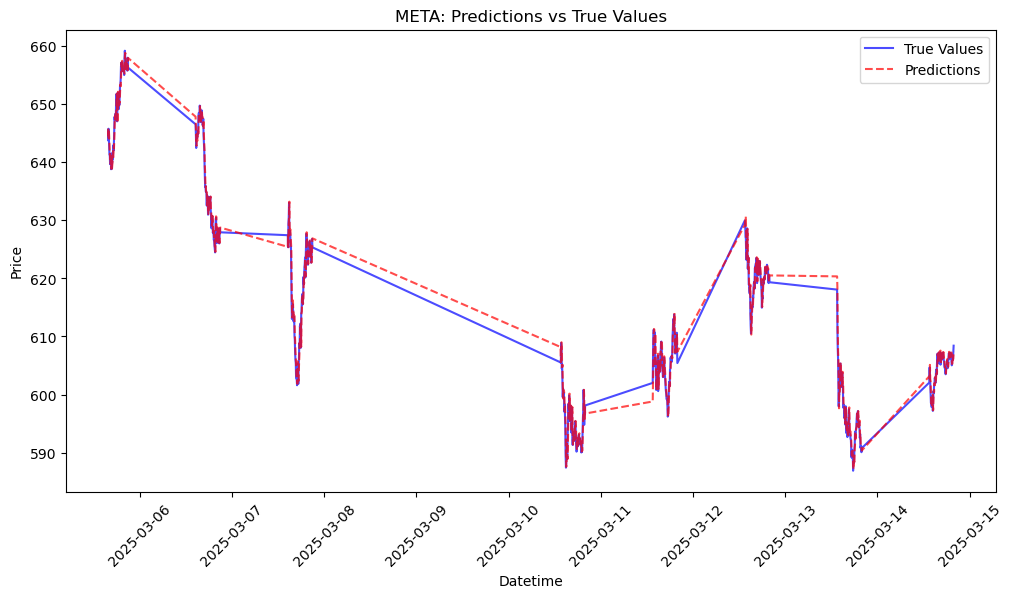

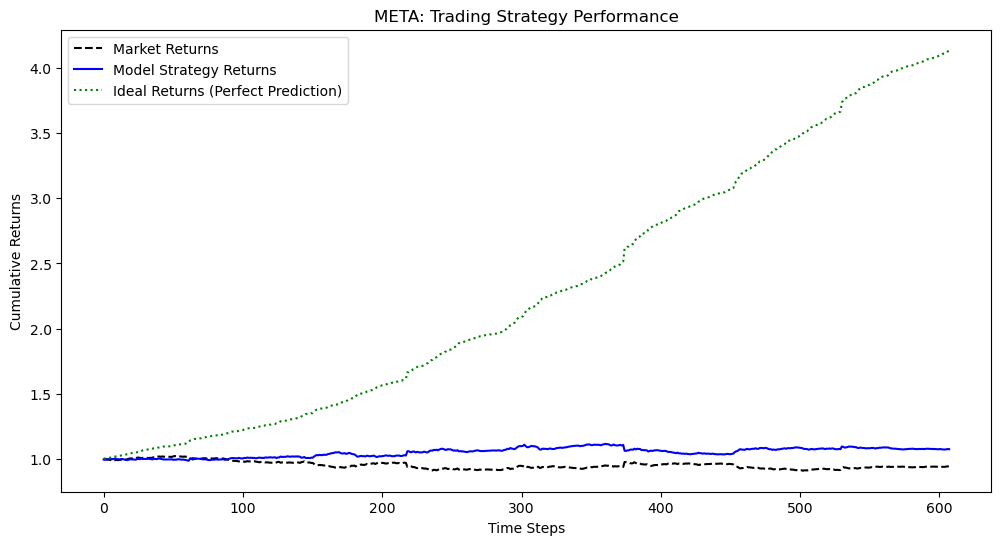

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os

# Directory where the data files are stored
data_dir = './data_with_indicators'  # Adjust this if necessary

# List of MAG-7 tickers
tickers = ["AAPL", "MSFT", "GOOGL", "NVDA", "TSLA", "AMZN", "META"]

# List all CSV files in the directory
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Function to process each stock, predict prices, and simulate trading
def process_stock(ticker, file_path):
    # Load dataset
    df = pd.read_csv(file_path, parse_dates=["Datetime"])

    # Filter data for the specific ticker
    df = df[df["Ticker"] == ticker]

    if df.empty:
        print(f"No data for {ticker} in {file_path}. Skipping...")
        return

    # Sort by datetime
    df = df.sort_values(by="Datetime")

    # Use 'Open' as the predictor and 'Close' as the target
    X = df[['Open']].values  # Predictor: Open price
    y = df['Close'].values  # Target: Close price

    # Split into train, validation, and test sets (60% train, 20% validation, 20% test)
    train_size = int(len(df) * 0.6)
    val_size = int(len(df) * 0.2)
    test_size = len(df) - train_size - val_size

    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    # Initialize Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Lists to store predictions, true values, and trading strategy performance
    predictions = []
    true_values = []
    strategy_returns = []
    actual_returns = []
    ideal_returns = []  # Assuming perfect predictions

    # Iterative prediction and retraining
    for i in range(len(X_test) - 1):
        # Predict the next timestamp closing price
        pred = model.predict([X_test[i]])[0]
        predictions.append(pred)
        true_values.append(y_test[i])
        
        # Calculate actual return (percentage change)
        actual_return = (y_test[i + 1] - y_test[i]) / y_test[i]
        actual_returns.append(actual_return)
        
        # Simulate trading strategy: Buy if price drops, Sell if price rises
        strategy_return = actual_return * (-1 if pred > y_test[i] else 1)
        strategy_returns.append(strategy_return)

        # Ideal return (assumes model **always** predicts correctly)
        ideal_return = abs(actual_return)
        ideal_returns.append(ideal_return)

        # Retrain the model with the latest actual data
        model.fit(X_train[:train_size + i + 1], y_train[:train_size + i + 1])

    # Compute cumulative returns
    cumulative_actual = (1 + np.array(actual_returns)).cumprod()
    cumulative_strategy = (1 + np.array(strategy_returns)).cumprod()
    cumulative_ideal = (1 + np.array(ideal_returns)).cumprod()

    # Final returns
    print(f"\nResults for {ticker} from {file_path}:")
    print(f"  Market Return: {cumulative_actual[-1]:.4f}")
    print(f"  Model Return: {cumulative_strategy[-1]:.4f}")
    print(f"  Ideal Return: {cumulative_ideal[-1]:.4f}")

    # Plot Predictions vs True Values
    plt.figure(figsize=(12, 6))
    plt.plot(df["Datetime"].iloc[train_size + val_size:train_size + val_size + len(true_values)], true_values, 
             label='True Values', color='blue', linestyle='-', alpha=0.7)
    plt.plot(df["Datetime"].iloc[train_size + val_size:train_size + val_size + len(predictions)], predictions, 
             label='Predictions', color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Datetime')
    plt.ylabel('Price')
    plt.title(f'{ticker}: Predictions vs True Values')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Plot Cumulative Returns
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_actual, label="Market Returns", color="black", linestyle="dashed")
    plt.plot(cumulative_strategy, label="Model Strategy Returns", color="blue")
    plt.plot(cumulative_ideal, label="Ideal Returns (Perfect Prediction)", color="green", linestyle="dotted")
    plt.xlabel("Time Steps")
    plt.ylabel("Cumulative Returns")
    plt.title(f"{ticker}: Trading Strategy Performance")
    plt.legend()
    plt.show()


# Process each stock in each file
for file in files:
    file_path = os.path.join(data_dir, file)
    
    for ticker in tickers:
        process_stock(ticker, file_path)


C:\Users\fauza\AppData\Local\Temp\ipykernel_29576\2794191160.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title


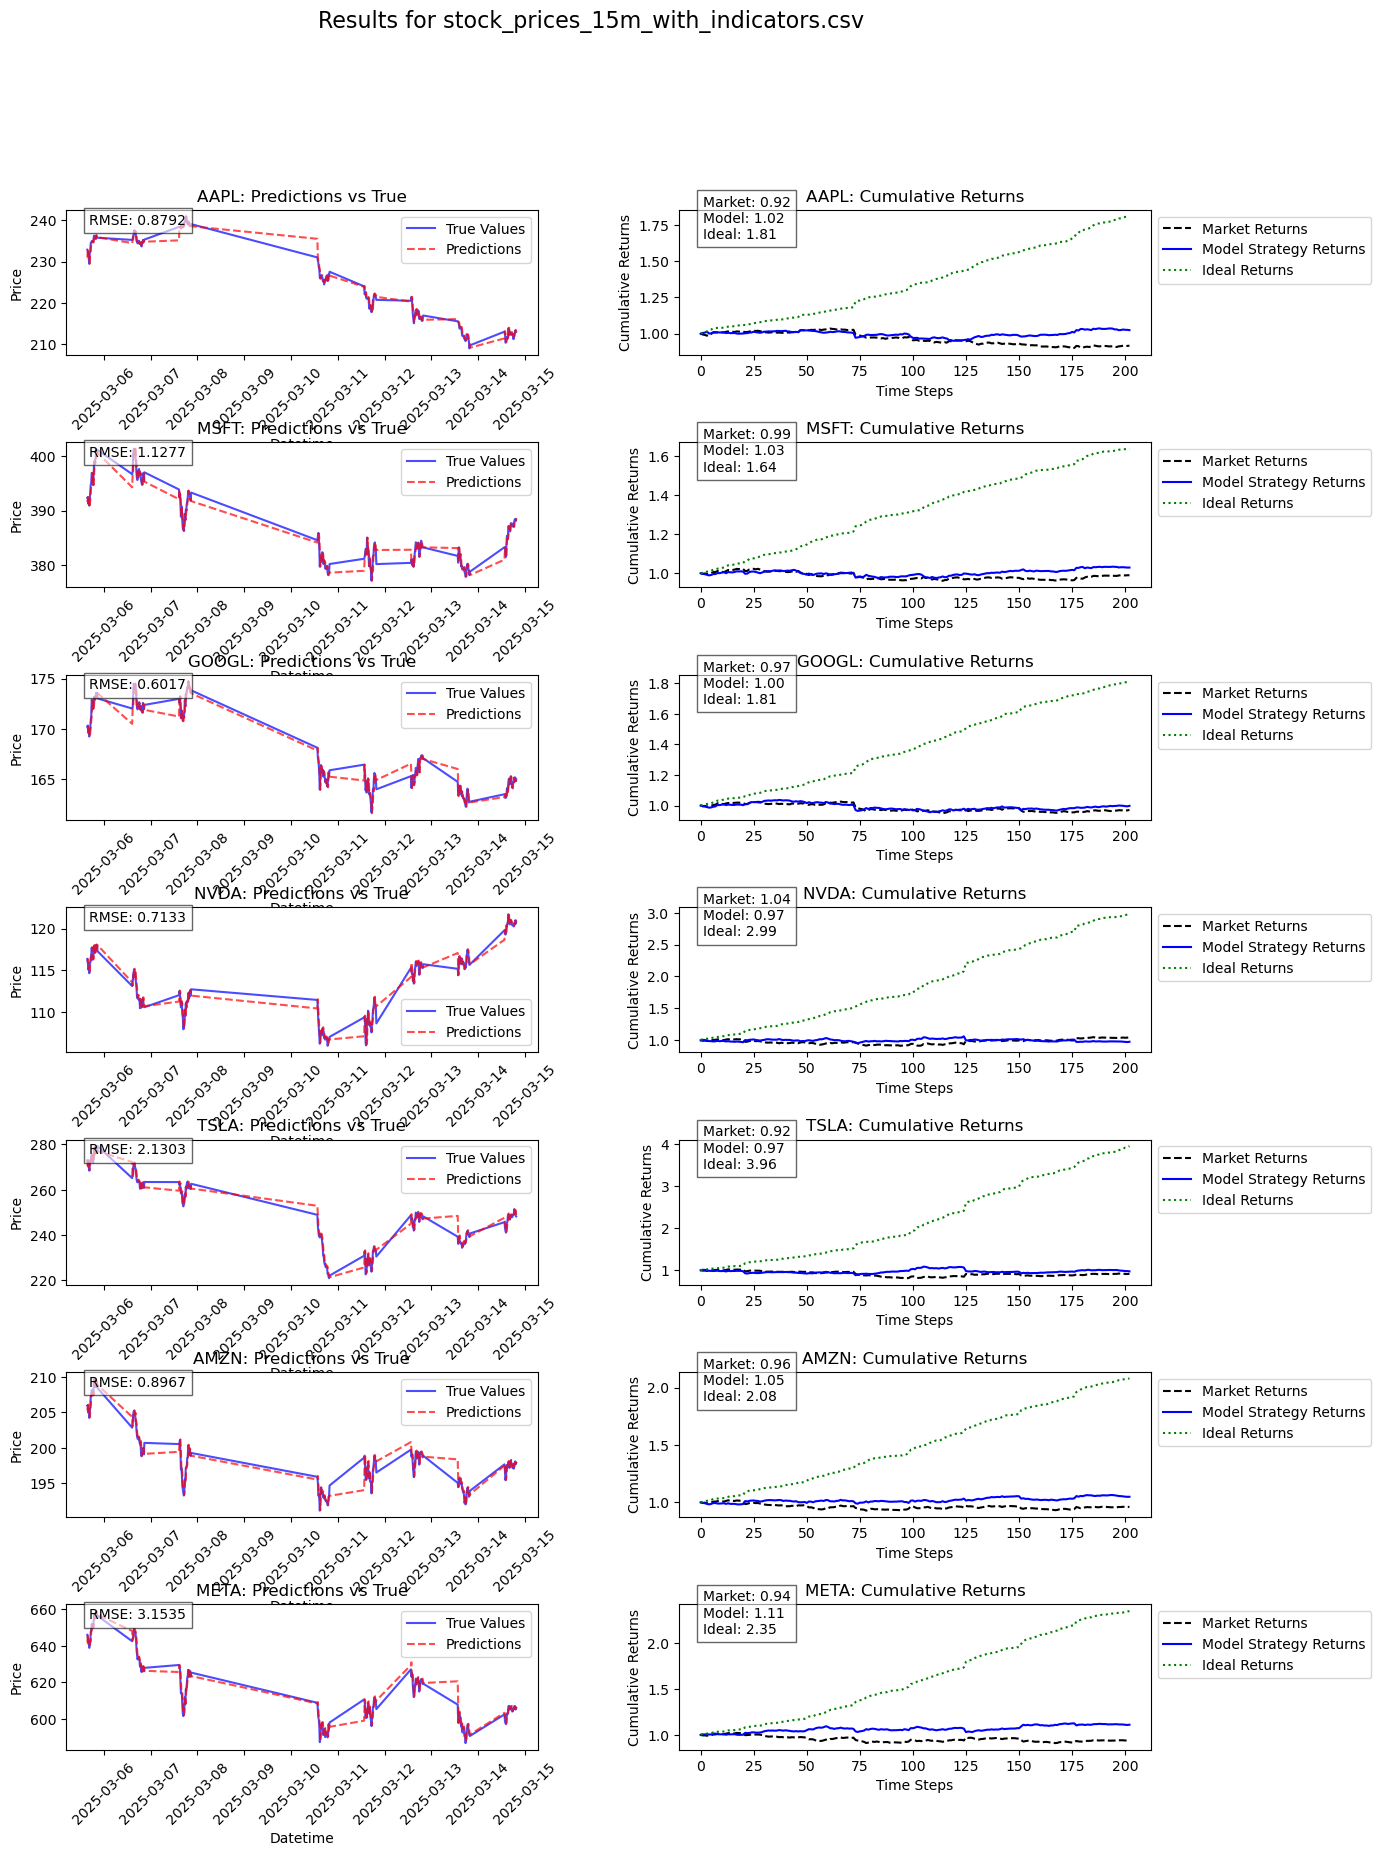

C:\Users\fauza\AppData\Local\Temp\ipykernel_29576\2794191160.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title


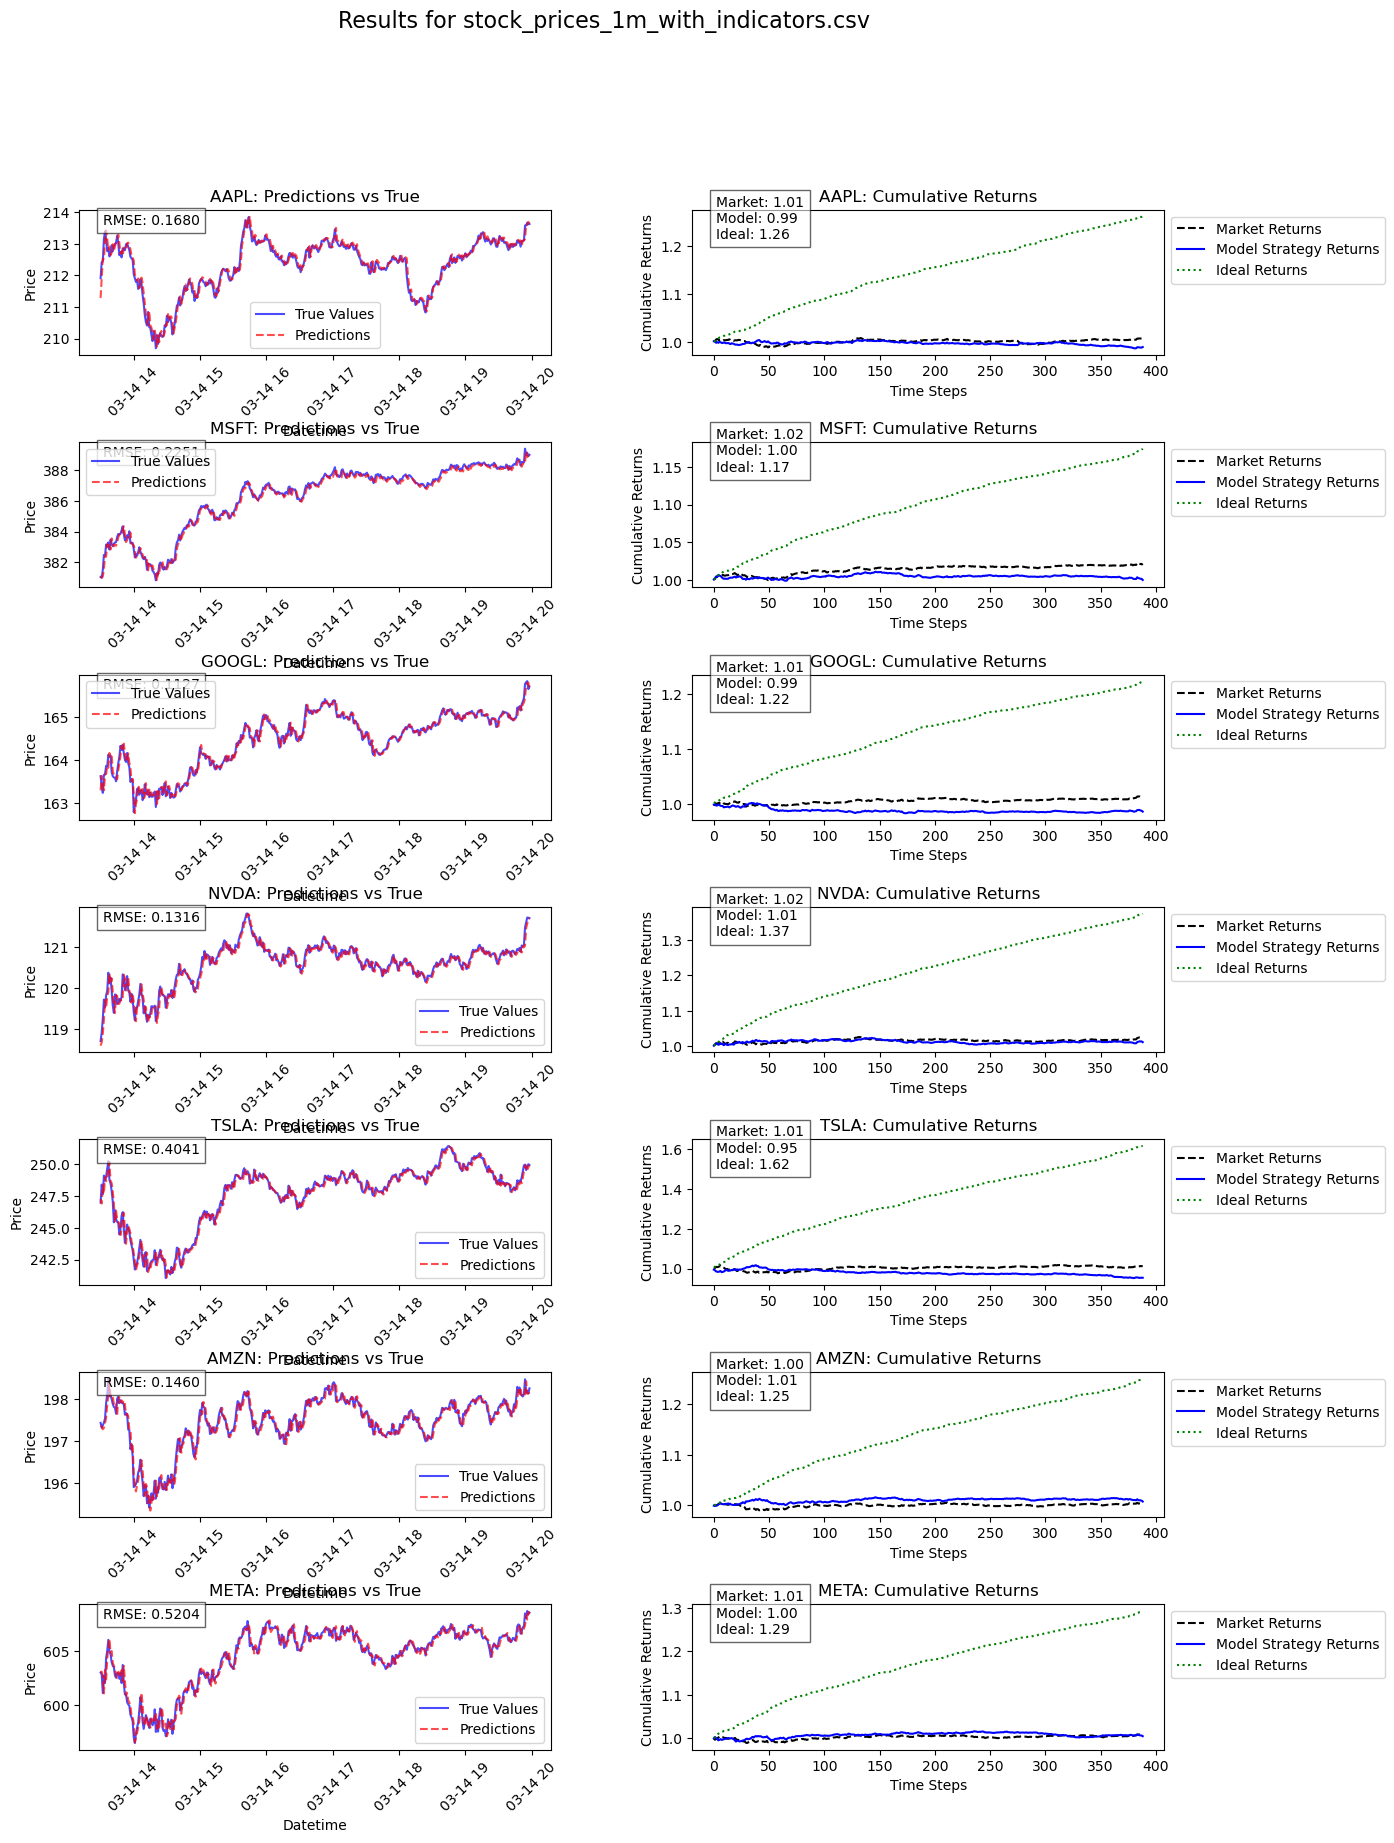

C:\Users\fauza\AppData\Local\Temp\ipykernel_29576\2794191160.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title


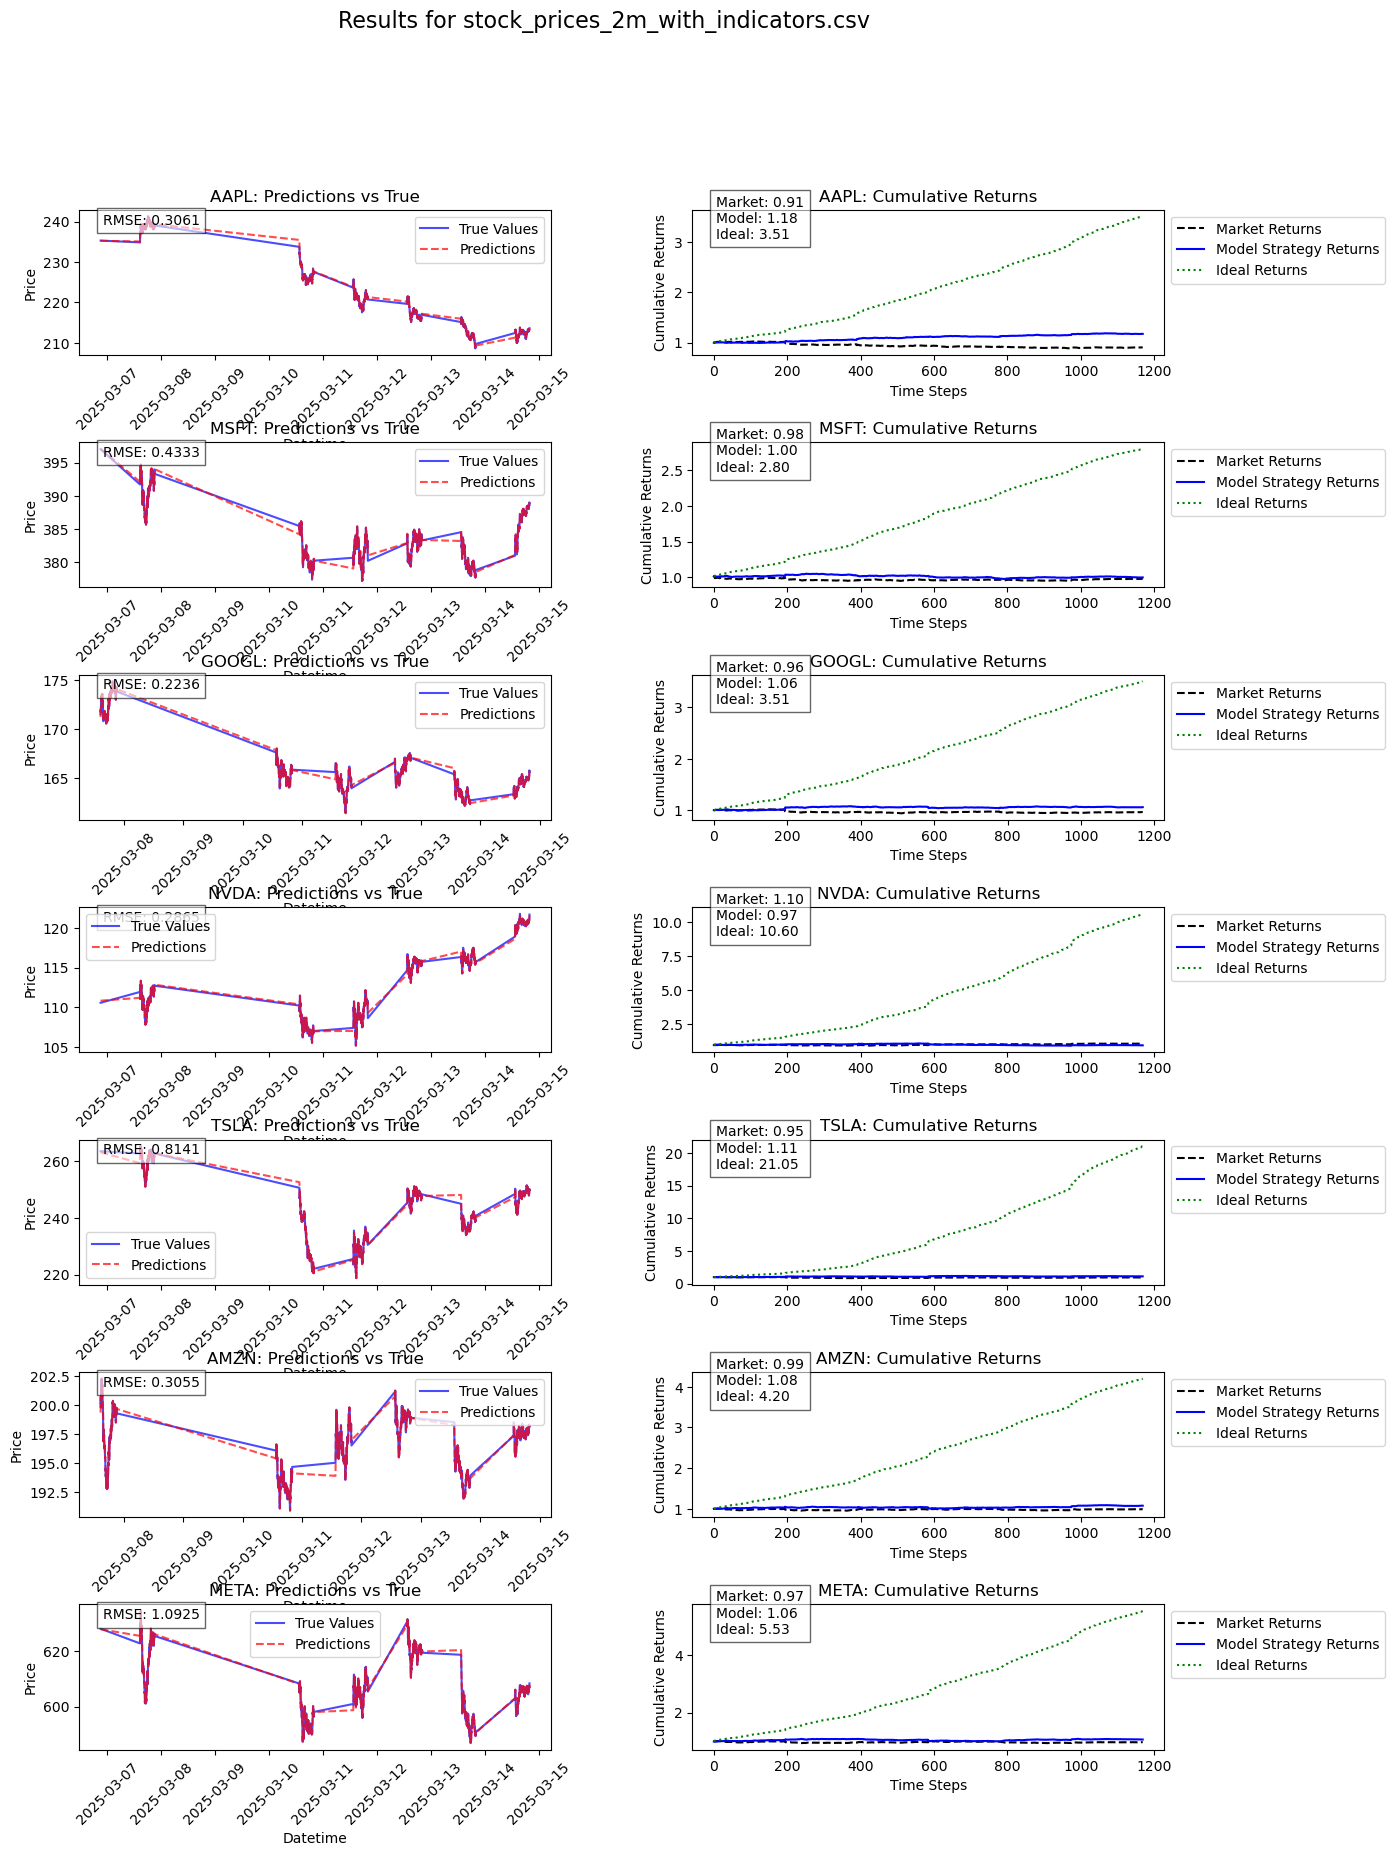

C:\Users\fauza\AppData\Local\Temp\ipykernel_29576\2794191160.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title


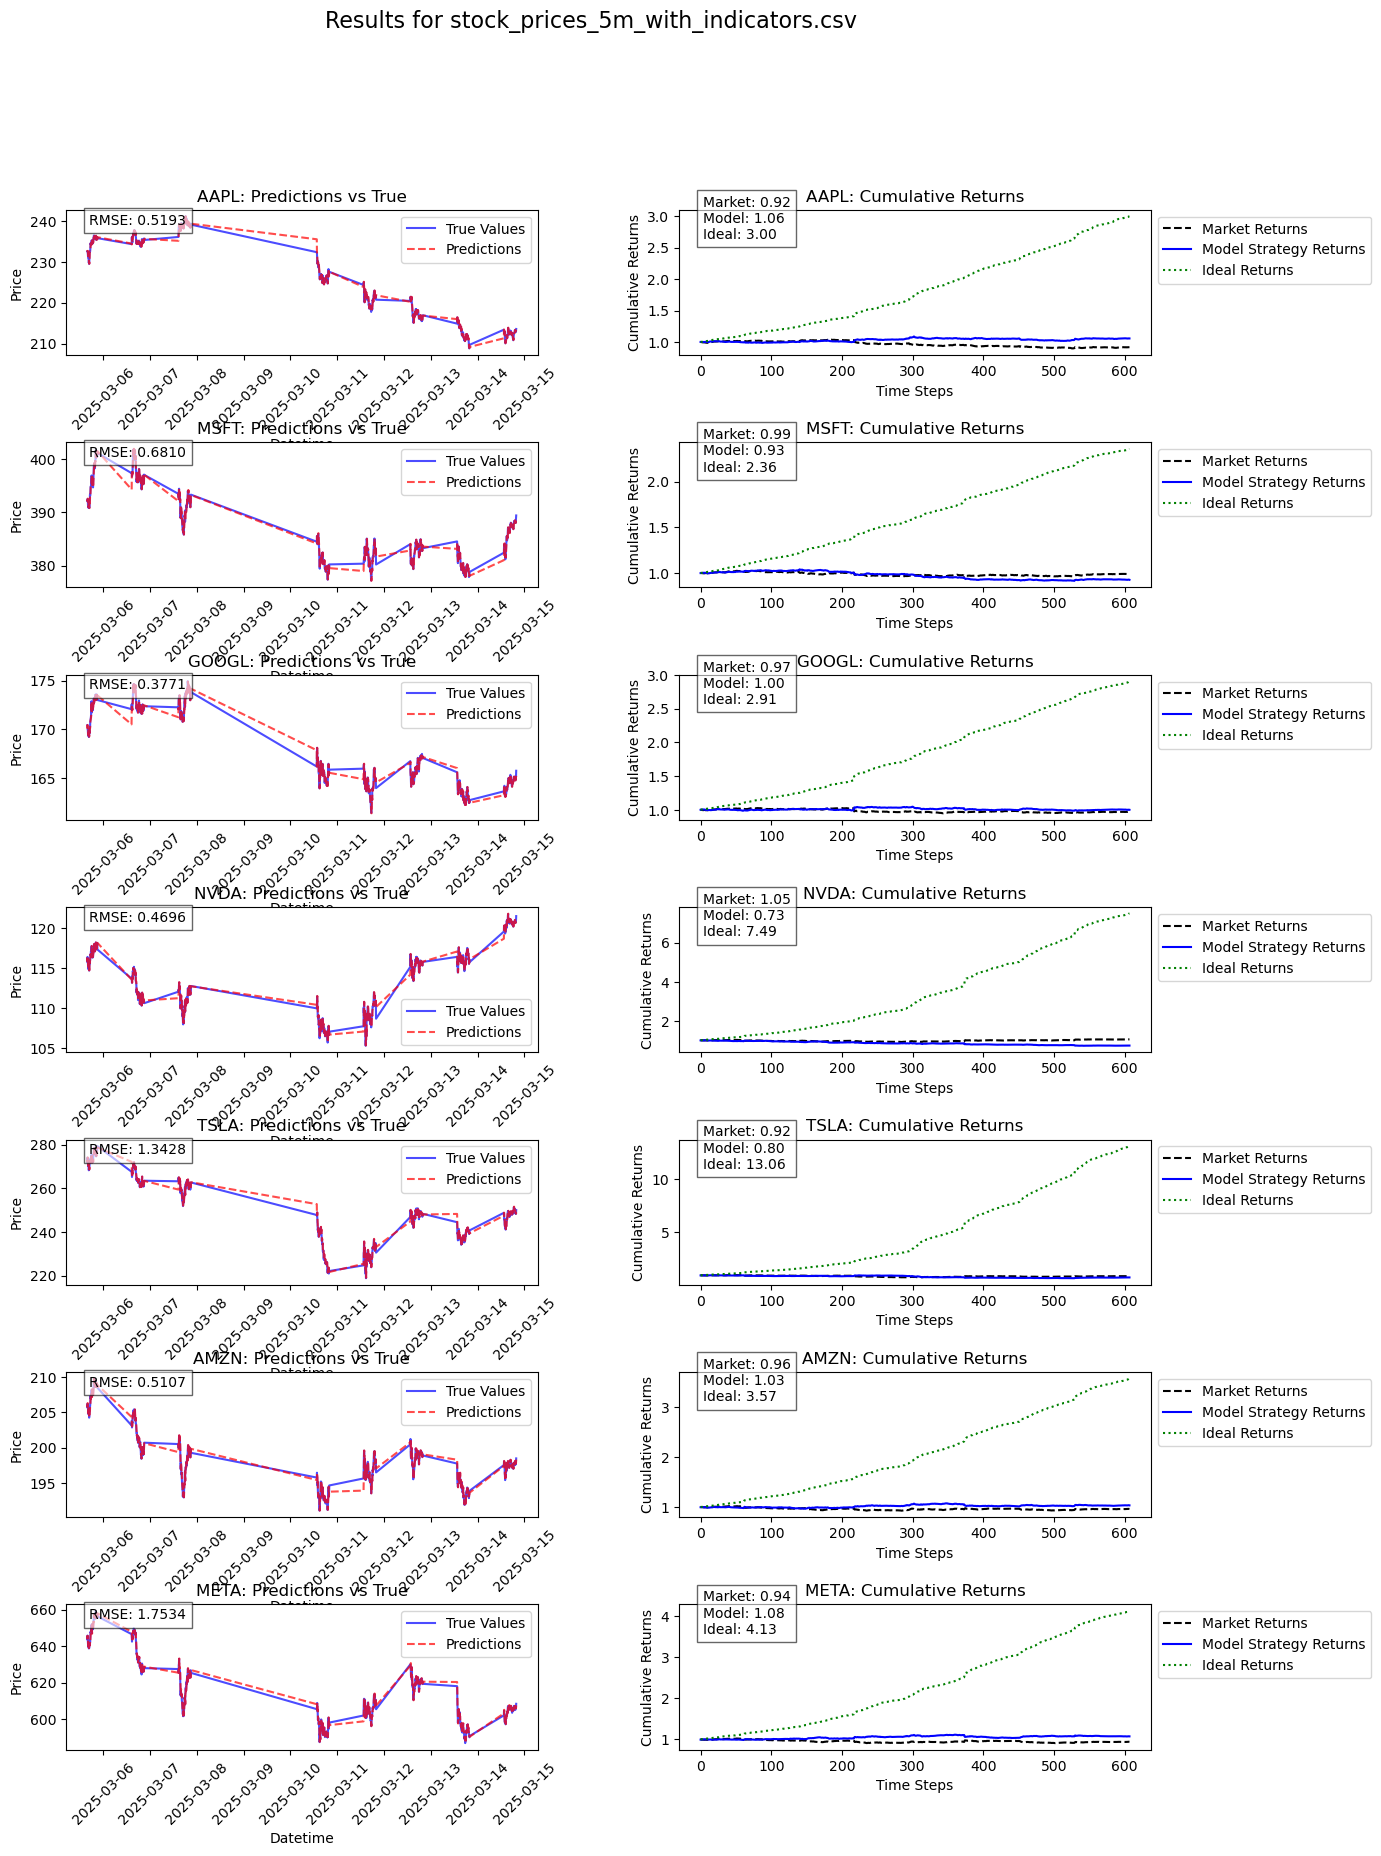

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os

# Directory where the data files are stored
data_dir = './data_with_indicators'  # Adjust if necessary

# List of MAG-7 tickers
tickers = ["AAPL", "MSFT", "GOOGL", "NVDA", "TSLA", "AMZN", "META"]

# List all CSV files in the directory
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Function to process each stock and return results
def process_stock(ticker, file_path):
    # Load dataset
    df = pd.read_csv(file_path, parse_dates=["Datetime"])

    # Filter data for the specific ticker
    df = df[df["Ticker"] == ticker]

    if df.empty:
        print(f"No data for {ticker} in {file_path}. Skipping...")
        return None

    # Sort by datetime
    df = df.sort_values(by="Datetime")

    # Use 'Open' as the predictor and 'Close' as the target
    X = df[['Open']].values  # Predictor: Open price
    y = df['Close'].values  # Target: Close price

    # Split into train, validation, and test sets (60% train, 20% validation, 20% test)
    train_size = int(len(df) * 0.6)
    val_size = int(len(df) * 0.2)
    test_size = len(df) - train_size - val_size

    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    # Initialize Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Lists to store predictions, true values, and trading strategy performance
    predictions = []
    true_values = []
    strategy_returns = []
    actual_returns = []
    ideal_returns = []  # Assuming perfect predictions

    # Iterative prediction and retraining
    for i in range(len(X_test) - 1):
        # Predict the next timestamp closing price
        pred = model.predict([X_test[i]])[0]
        predictions.append(pred)
        true_values.append(y_test[i])
        
        # Calculate actual return (percentage change)
        actual_return = (y_test[i + 1] - y_test[i]) / y_test[i]
        actual_returns.append(actual_return)
        
        # Simulate trading strategy: Buy if price drops, Sell if price rises
        strategy_return = actual_return * (-1 if pred > y_test[i] else 1)
        strategy_returns.append(strategy_return)

        # Ideal return (assumes model **always** predicts correctly)
        ideal_return = abs(actual_return)
        ideal_returns.append(ideal_return)

        # Retrain the model with the latest actual data
        model.fit(X_train[:train_size + i + 1], y_train[:train_size + i + 1])

    # Compute cumulative returns
    cumulative_actual = (1 + np.array(actual_returns)).cumprod()
    cumulative_strategy = (1 + np.array(strategy_returns)).cumprod()
    cumulative_ideal = (1 + np.array(ideal_returns)).cumprod()

    # Compute RMSE for predictions vs true values
    rmse = np.sqrt(mean_squared_error(true_values, predictions))

    return {
        "ticker": ticker,
        "datetimes": df["Datetime"].iloc[train_size + val_size:train_size + val_size + len(true_values)],
        "true_values": true_values,
        "predictions": predictions,
        "cumulative_actual": cumulative_actual,
        "cumulative_strategy": cumulative_strategy,
        "cumulative_ideal": cumulative_ideal,
        "rmse": rmse
    }

# Process each file and generate facet plots
for file in files:
    file_path = os.path.join(data_dir, file)
    
    results = []
    for ticker in tickers:
        result = process_stock(ticker, file_path)
        if result:
            results.append(result)

    if not results:
        continue  # Skip if no valid results

    # Create a 2x7 facet grid (Left: Predictions vs True, Right: Cumulative Returns)
    fig, axes = plt.subplots(7, 2, figsize=(14, 20), gridspec_kw={'hspace': 0.6, 'wspace': 0.3})

    for idx, result in enumerate(results):
        ticker = result["ticker"]

        # **Left: Predictions vs True Values**
        ax1 = axes[idx, 0]
        ax1.plot(result["datetimes"], result["true_values"], label='True Values', color='blue', linestyle='-', alpha=0.7)
        ax1.plot(result["datetimes"], result["predictions"], label='Predictions', color='red', linestyle='--', alpha=0.7)
        ax1.set_title(f'{ticker}: Predictions vs True')
        ax1.set_xlabel('Datetime')
        ax1.set_ylabel('Price')
        ax1.legend()
        ax1.tick_params(axis='x', rotation=45)
        
        # Annotate RMSE on the plot
        ax1.text(0.05, 0.9, f'RMSE: {result["rmse"]:.4f}', transform=ax1.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

        # **Right: Cumulative Returns**
        ax2 = axes[idx, 1]
        ax2.plot(result["cumulative_actual"], label="Market Returns", color="black", linestyle="dashed")
        ax2.plot(result["cumulative_strategy"], label="Model Strategy Returns", color="blue")
        ax2.plot(result["cumulative_ideal"], label="Ideal Returns", color="green", linestyle="dotted")
        ax2.set_title(f'{ticker}: Cumulative Returns')
        ax2.set_xlabel("Time Steps")
        ax2.set_ylabel("Cumulative Returns")
        ax2.legend(loc="upper left", bbox_to_anchor=(1, 1))

        # Annotate final cumulative returns
        final_actual = result["cumulative_actual"][-1]
        final_strategy = result["cumulative_strategy"][-1]
        final_ideal = result["cumulative_ideal"][-1]
        ax2.text(0.05, 0.8, f'Market: {final_actual:.2f}\nModel: {final_strategy:.2f}\nIdeal: {final_ideal:.2f}', 
                 transform=ax2.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

    # Set main title
    fig.suptitle(f"Results for {file}", fontsize=16)

    # Show plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()


C:\Users\fauza\AppData\Local\Temp\ipykernel_29576\2048088403.py:160: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


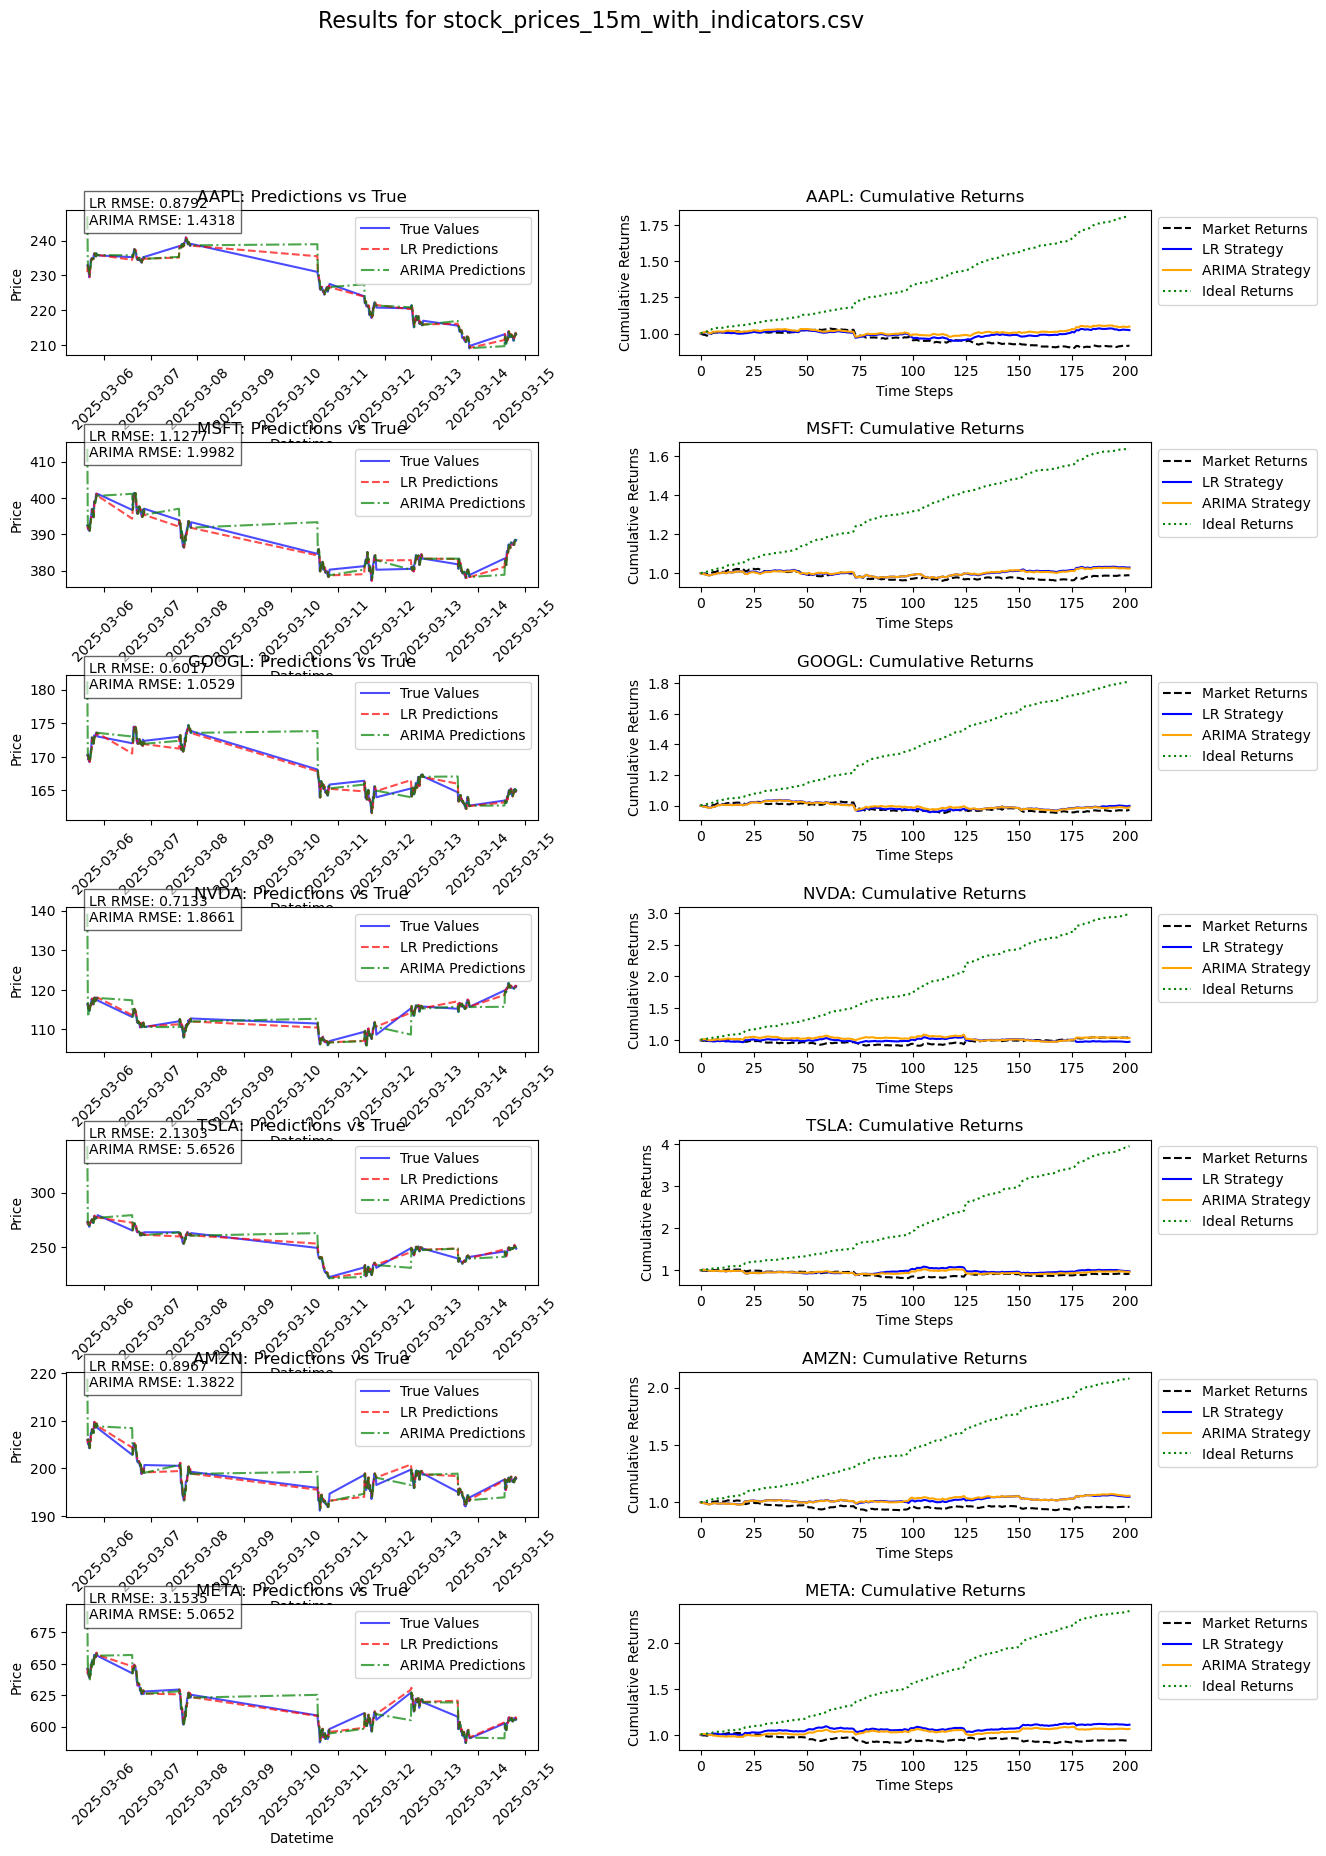

C:\Users\fauza\AppData\Local\Temp\ipykernel_29576\2048088403.py:160: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


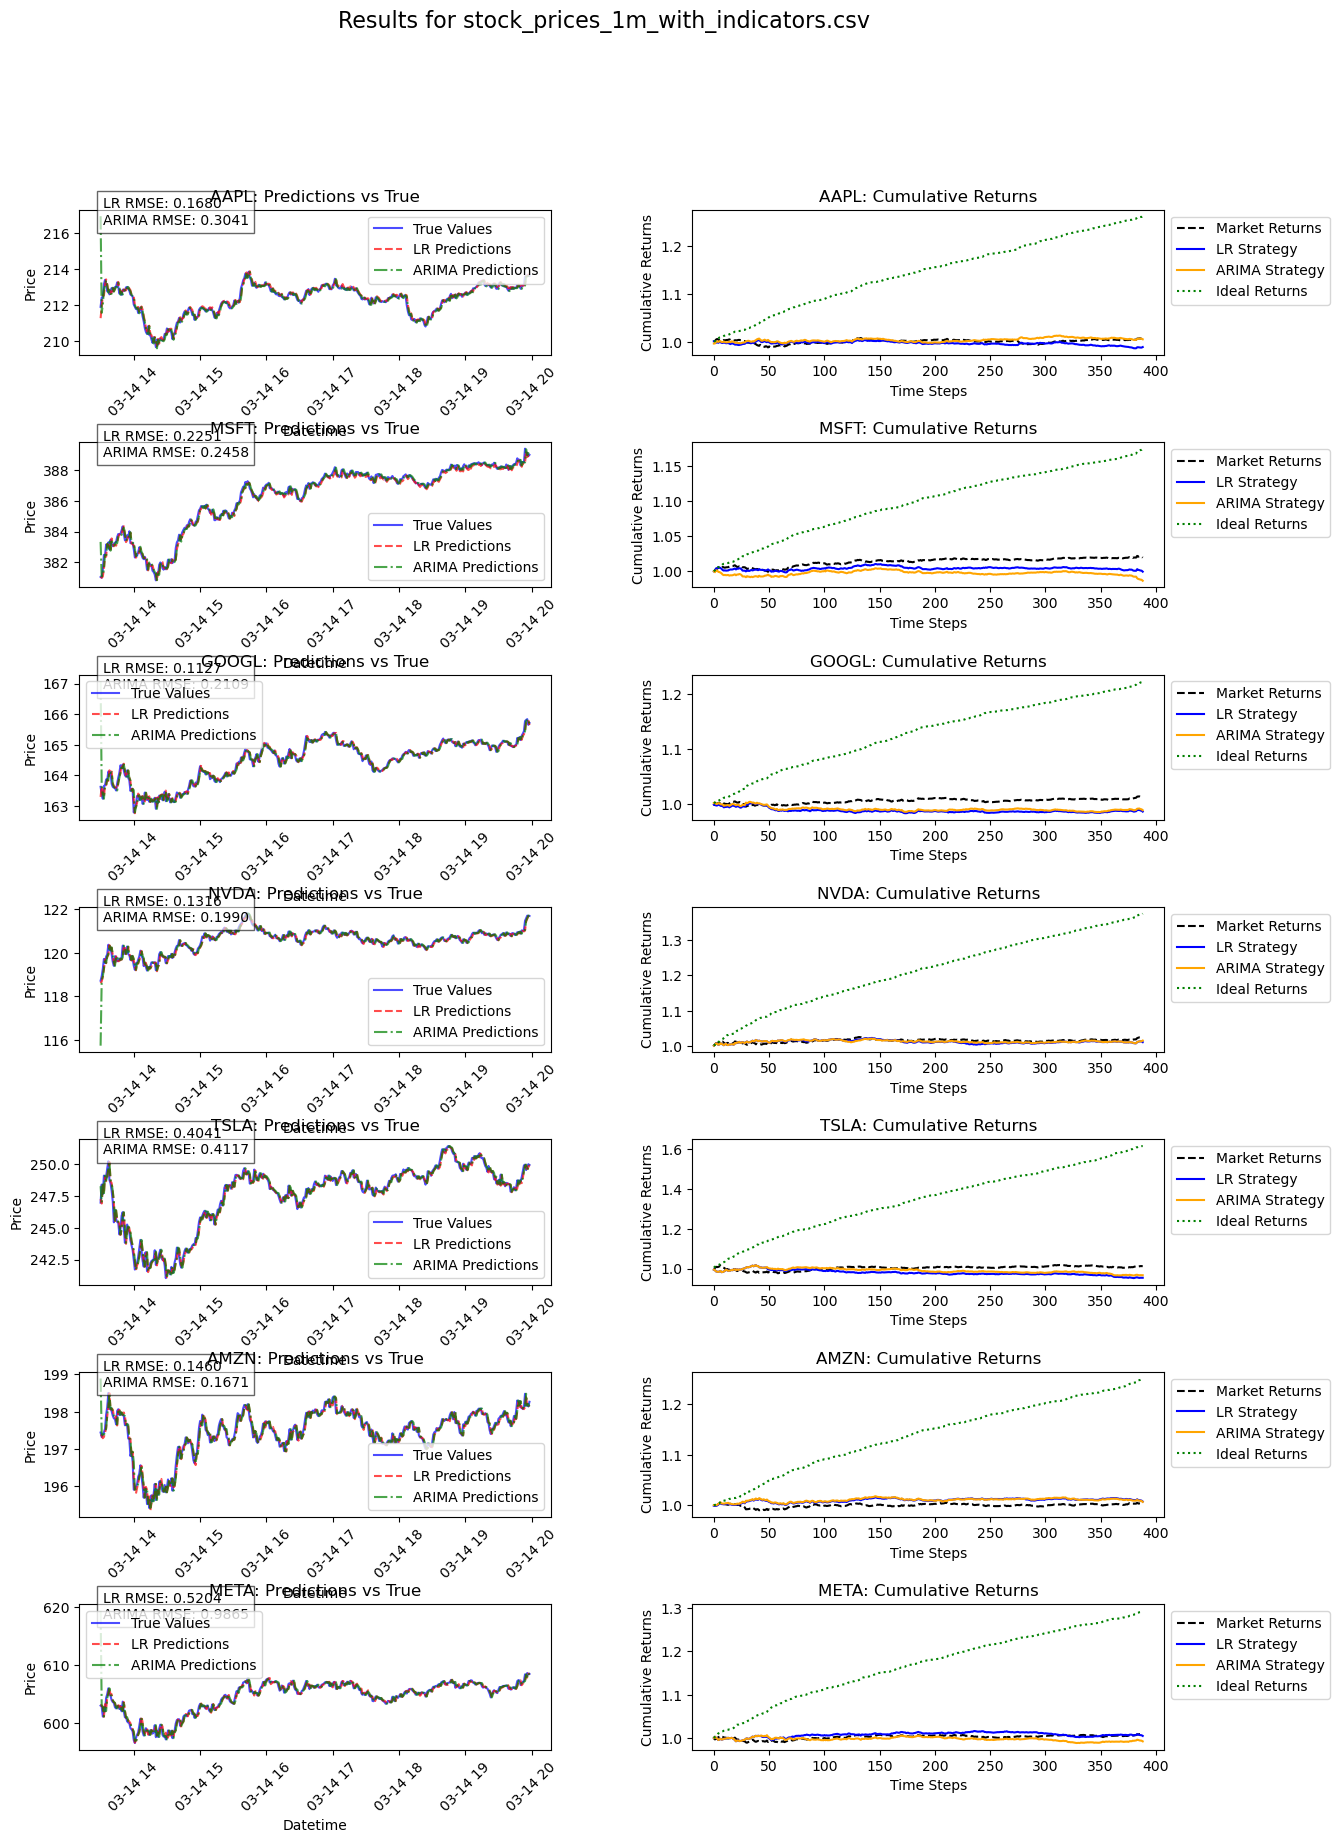

KeyboardInterrupt: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Directory where the data files are stored
data_dir = './data_with_indicators'  # Adjust if necessary

# List of MAG-7 tickers
tickers = ["AAPL", "MSFT", "GOOGL", "NVDA", "TSLA", "AMZN", "META"]

# List all CSV files in the directory
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Function to process each stock for LR and ARIMA
def process_stock(ticker, file_path):
    # Load dataset
    df = pd.read_csv(file_path, parse_dates=["Datetime"])
    df = df[df["Ticker"] == ticker]

    if df.empty:
        print(f"No data for {ticker} in {file_path}. Skipping...")
        return None

    # Sort by datetime
    df = df.sort_values(by="Datetime")

    # Use 'Open' as the predictor and 'Close' as the target
    X = df[['Open']].values  # Predictor: Open price
    y = df['Close'].values  # Target: Close price

    # Split into train, validation, and test sets (60% train, 20% validation, 20% test)
    train_size = int(len(df) * 0.6)
    val_size = int(len(df) * 0.2)

    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    # Initialize the models
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    arima_model = auto_arima(y_train, seasonal=False, stepwise=True, suppress_warnings=True)

    # Lists to store predictions, true values, and trading strategy performance
    lr_predictions = []
    arima_predictions = []
    true_values = []
    lr_strategy_returns = []
    arima_strategy_returns = []
    actual_returns = []
    ideal_returns = []

    # Iterative prediction and retraining
    for i in range(len(X_test) - 1):
        # Predict using Linear Regression
        lr_pred = lr_model.predict([X_test[i]])[0]
        lr_predictions.append(lr_pred)

        # Predict using ARIMA
        arima_pred = arima_model.predict(n_periods=1)[0]
        arima_predictions.append(arima_pred)
        arima_model.update(y_test[i])  # Update ARIMA with actual value

        # Store true value
        true_values.append(y_test[i])

        # Calculate actual return (percentage change)
        actual_return = (y_test[i + 1] - y_test[i]) / y_test[i]
        actual_returns.append(actual_return)

        # LR trading strategy: Buy if price predicted to rise, Sell if predicted to fall
        lr_strategy_return = actual_return * (-1 if lr_pred > y_test[i] else 1)
        lr_strategy_returns.append(lr_strategy_return)

        # ARIMA trading strategy: Buy if price predicted to rise, Sell if predicted to fall
        arima_strategy_return = actual_return * (-1 if arima_pred > y_test[i] else 1)
        arima_strategy_returns.append(arima_strategy_return)

        # Ideal return (assumes model **always** predicts correctly)
        ideal_return = abs(actual_return)
        ideal_returns.append(ideal_return)

        # Retrain the Linear Regression model
        lr_model.fit(X_train[:train_size + i + 1], y_train[:train_size + i + 1])

    # Compute cumulative returns
    cumulative_actual = (1 + np.array(actual_returns)).cumprod()
    cumulative_lr_strategy = (1 + np.array(lr_strategy_returns)).cumprod()
    cumulative_arima_strategy = (1 + np.array(arima_strategy_returns)).cumprod()
    cumulative_ideal = (1 + np.array(ideal_returns)).cumprod()

    # Compute RMSE for predictions vs true values
    lr_rmse = np.sqrt(mean_squared_error(true_values, lr_predictions))
    arima_rmse = np.sqrt(mean_squared_error(true_values, arima_predictions))

    return {
        "ticker": ticker,
        "datetimes": df["Datetime"].iloc[train_size + val_size:train_size + val_size + len(true_values)],
        "true_values": true_values,
        "lr_predictions": lr_predictions,
        "arima_predictions": arima_predictions,
        "cumulative_actual": cumulative_actual,
        "cumulative_lr_strategy": cumulative_lr_strategy,
        "cumulative_arima_strategy": cumulative_arima_strategy,
        "cumulative_ideal": cumulative_ideal,
        "lr_rmse": lr_rmse,
        "arima_rmse": arima_rmse
    }

# Process each file and generate facet plots
for file in files:
    file_path = os.path.join(data_dir, file)

    results = []
    for ticker in tickers:
        result = process_stock(ticker, file_path)
        if result:
            results.append(result)

    if not results:
        continue  # Skip if no valid results

    # Create a 2x7 facet grid (Left: Predictions vs True, Right: Cumulative Returns)
    fig, axes = plt.subplots(7, 2, figsize=(14, 20), gridspec_kw={'hspace': 0.6, 'wspace': 0.3})

    for idx, result in enumerate(results):
        ticker = result["ticker"]

        # **Left: Predictions vs True Values**
        ax1 = axes[idx, 0]
        ax1.plot(result["datetimes"], result["true_values"], label='True Values', color='blue', linestyle='-', alpha=0.7)
        ax1.plot(result["datetimes"], result["lr_predictions"], label='LR Predictions', color='red', linestyle='--', alpha=0.7)
        ax1.plot(result["datetimes"], result["arima_predictions"], label='ARIMA Predictions', color='green', linestyle='-.', alpha=0.7)
        ax1.set_title(f'{ticker}: Predictions vs True')
        ax1.set_xlabel('Datetime')
        ax1.set_ylabel('Price')
        ax1.legend()
        ax1.tick_params(axis='x', rotation=45)

        # Annotate RMSE on the plot
        ax1.text(0.05, 0.9, f'LR RMSE: {result["lr_rmse"]:.4f}\nARIMA RMSE: {result["arima_rmse"]:.4f}', 
                 transform=ax1.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

        # **Right: Cumulative Returns**
        ax2 = axes[idx, 1]
        ax2.plot(result["cumulative_actual"], label="Market Returns", color="black", linestyle="dashed")
        ax2.plot(result["cumulative_lr_strategy"], label="LR Strategy", color="blue")
        ax2.plot(result["cumulative_arima_strategy"], label="ARIMA Strategy", color="orange")
        ax2.plot(result["cumulative_ideal"], label="Ideal Returns", color="green", linestyle="dotted")
        ax2.set_title(f'{ticker}: Cumulative Returns')
        ax2.set_xlabel("Time Steps")
        ax2.set_ylabel("Cumulative Returns")
        ax2.legend(loc="upper left", bbox_to_anchor=(1, 1))

    fig.suptitle(f"Results for {file}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
